# Project: Food and Nutrition - Spring 2022
-----------------------------------------------
**OPIM 5512: Data Science Using Python - University of Connecticut**
The purpose of this project is to assess your skills on data wrangling and pre-processing, data wrangling, modeling, evaluation and technical communication. 

You will do this by exploring a comprehensive dataset on food items, their nutritional attributes, and how they are related to CHOLESTEROL. 

# Introduction (2.5 pts)

Read the following websites related to the dataset 
* https://corgis-edu.github.io/corgis/csv/food/
* https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/
* https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/fndds/FNDDS_2017_2018_factsheet.pdf

Write at least five sentences about you are doing in this notebook. You may want to write this at the very end after you complete your analysis. Add a nice picture or two take make your notebook look nice. 

List your group number and name of each project member.

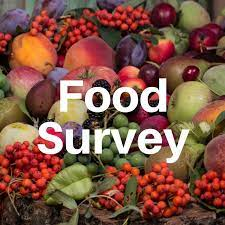

##The Goal of this Notebook:

The goal of this notebook is to investigate the various relationships between different types of foodstuffs and the vitamins, minerals, and nutrients they contain. To this end, we have provided literary analysis, as well as graphical and statistical analysis of the dataset provided. We have analyzed correlations between many of the different nutrients and chemicals that comprise food, on both a broad and more concentrated levels for specific groupings. We investigated specific relationships further, such as that found between milk products and cholesterol, as well as cholesterol and choline. Furthermore, we aim to display various models, such as those which predict the presence of cholesterol in a particular food based on various other variables.

##Group 14 Members:

- John Fowler
- Konda Akash Deep
- Madhusree Chowdhury
- Shylesh Pala

# Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# polynomial and interaction terms
from sklearn.preprocessing import PolynomialFeatures # interaction terms and polynomials
from sklearn.decomposition import PCA # prinicpal components 

# Read Data from Website (2.5 pts)
* Read data from the website and print the shape
* Use Python to count how many nutrients there are (including cholesterol).

In [ ]:
# read the data
# note how we can read from the website if we want to! you can also read from your google drive
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df.head(40)

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
5,Milk,"Milk, calcium fortified, low fat (1%)",11111160,0,1,0,5.19,5,17.4,0.0,...,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
6,Milk,"Milk, calcium fortified, fat free (skim)",11111170,0,0,0,4.85,2,16.0,0.0,...,101,166,52,0.40,137,0.38,0.040,1.0,0.01,0.0
7,Milk,"Milk, reduced fat (2%)",11112110,0,3,0,4.91,8,18.2,0.0,...,103,159,39,0.43,83,0.55,0.061,0.2,0.03,0.2
8,Milk,"Milk, acidophilus, low fat (1%)",11112120,0,1,0,5.19,5,17.4,0.0,...,103,159,39,0.43,58,0.61,0.060,0.0,0.02,0.1
9,Milk,"Milk, acidophilus, reduced fat (2%)",11112130,0,3,0,4.91,8,18.2,0.0,...,103,159,39,0.43,83,0.55,0.061,0.2,0.03,0.2


In [ ]:
df.info() # to look at the column names in details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        7083 non-null   object 
 1   Description                     7083 non-null   object 
 2   Nutrient Data Bank Number       7083 non-null   int64  
 3   Data.Alpha Carotene             7083 non-null   int64  
 4   Data.Beta Carotene              7083 non-null   int64  
 5   Data.Beta Cryptoxanthin         7083 non-null   int64  
 6   Data.Carbohydrate               7083 non-null   float64
 7   Data.Cholesterol                7083 non-null   int64  
 8   Data.Choline                    7083 non-null   float64
 9   Data.Fiber                      7083 non-null   float64
 10  Data.Lutein and Zeaxanthin      7083 non-null   int64  
 11  Data.Lycopene                   7083 non-null   int64  
 12  Data.Niacin                     70

Here's the shape of the dataset!

In [ ]:
#Now we print the shape
print(df.shape)

(7083, 38)


Here is the number of nutrients within the data!

In [ ]:
tmp = df.iloc[:,3:] #Create subset of just nutrient columns
print("There are", len(tmp.columns),"types of nutrients in the dataset.") #Print the amount of nutrients in the subset

There are 35 types of nutrients in the dataset.


In [ ]:
# to print the nutrient's names
print(tmp.columns) 

Index(['Data.Alpha Carotene', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin',
       'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Niacin',
       'Data.Protein', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium',
       'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium',
       'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium',
       'Data.Major Minerals.Sodium', 'Data.Major Minerals.Zinc',
       'Data.Vitamins.Vitamin A - RAE', 'Data.Vitamins.Vitamin B12',
       'Data.Vitamins.Vitamin B6', 'Data.Vitamins.Vitamin C',
       'Data.Vitamins.Vitamin E', 'Data.Vitamins.Vitamin K'],
      dtype='object')


# Random Sampling (2.5 pts)
Take a random sample according to your Group Number (as given in HuskyCT).

* Shuffle the dataframe with a random seed equal to your group number, and then take a random sample of 90% of the original data without replacement (using your group number the random seed).

In [ ]:
#Here we randomly sample the data! Shuffling occurs within the .sample() call
tmp = df.sample(frac = .9, replace = False, random_state = 14)

Now let's check how the shuffled sample looks!

In [ ]:
tmp.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
412,Vegetable dip,"Vegetable dip, light",12350255,0,34,1,13.60,24,14.0,0.3,...,44,138,602,0.32,46,0.19,0.020,1.6,1.23,37.5
5580,Collards,"Collards, frozen, cooked, no added fat",72107212,127,6798,28,7.08,0,45.0,2.8,...,27,250,166,0.27,573,0.00,0.114,26.3,1.25,621.3
6289,Potato and ham fritters,"Potato and ham fritters, Puerto Rican style",77121110,0,1,1,12.44,45,46.7,1.5,...,95,344,485,0.66,17,0.21,0.284,8.4,1.51,15.2
3110,Roll,"Roll, bran, NS as to type of bran",51000400,0,0,0,44.60,0,26.5,3.8,...,122,160,458,1.05,0,0.01,0.092,0.0,0.07,3.1
2433,Frankfurter or hot dog sandwich,"Frankfurter or hot dog sandwich, beef, plain, ...",27564061,0,3,0,22.57,34,25.2,1.9,...,139,272,692,1.73,13,0.57,0.117,0.6,0.48,4.1


As you can see based on the index values, they are all shuffled and randomly sampled!

# Missing Values (5 pts)
Show two different ways of checking for missing values per column (you can use `.info` as one of them.) If there are missing values, impute them and provide motivation for why you are imputing. If there are no missing values, move on.

##Method 1: .info()

We'll first use .info() to check and see if there are missing values in the set! But before we do that, we should check the subset's shape to see how many records are present to compare against!



In [ ]:
print(tmp.shape) #Prints the shape of tmp

(6375, 38)


Now we can check .info()

In [ ]:
tmp.info() #Gives the info for tmp (specifically used for Non-Null Count in this instance)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6375 entries, 412 to 564
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        6375 non-null   object 
 1   Description                     6375 non-null   object 
 2   Nutrient Data Bank Number       6375 non-null   int64  
 3   Data.Alpha Carotene             6375 non-null   int64  
 4   Data.Beta Carotene              6375 non-null   int64  
 5   Data.Beta Cryptoxanthin         6375 non-null   int64  
 6   Data.Carbohydrate               6375 non-null   float64
 7   Data.Cholesterol                6375 non-null   int64  
 8   Data.Choline                    6375 non-null   float64
 9   Data.Fiber                      6375 non-null   float64
 10  Data.Lutein and Zeaxanthin      6375 non-null   int64  
 11  Data.Lycopene                   6375 non-null   int64  
 12  Data.Niacin                     6

As you can see, there are no null values present!! All rows have 6375 Non-Null Counts. That's great! But, just to be sure, let's try another way!

##Method 2: df.isna()

We now will use df.isna() to see how many nulls are present in the subset!


In [ ]:
#.isna() will check for nulls across the dataset. .sum() used twice to sum by column, then sum those sums
print("There are",tmp.isna().sum().sum(),"null values in the data subset.")   #Print the results

There are 0 null values in the data subset.


# Literature Review and Basic EDA (23 pts)



![picture](https://www.heart.org/-/media/Images/Healthy-Living/Healthy-Eating/Superfoods.png)

## Lit review (10 pts)
There is wonderful information on each of the nutrients here:
* https://corgis-edu.github.io/corgis/csv/food/

Tell a story about different food products and their cholesterol values - what do they have in common? What foods are high in cholesterol? Which nutrients are most correlated with cholesterol? Back your analysis up with at least 10 citations - cite them inline [1] and also as a list below so we know where you got the source.

**Citations**
1. "How to Calculate Net Carbs for Keto in 2 Simple Steps" (https://www.trifectanutrition.com/blog/how-to-calculate-net-carbs-for-keto-in-2-simple-steps)
2. "High Cholesterol Foods to Eat and Avoid" (https://health.clevelandclinic.org/high-cholesterol-foods-to-eat-and-avoid/)
3. "Cholesterol - Healthy Eating Tips" (https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/cholesterol-healthy-eating-tips)
4. "Choline" (https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=19&contentid=choline#:~:text=Choline%20supplements%20are%20said%20to,neural%20tube%20defects%20in%20pregnancy.)
5. "Effect of Choline and Cholesterol on Lipoprotein
Patterns of Rats" (https://www.ahajournals.org/doi/pdf/10.1161/01.RES.5.1.111)
6. "Effect of whole milk compared with skimmed milk on fasting blood lipids in healthy adults" (https://pubmed.ncbi.nlm.nih.gov/29229955/)
7. "What Happens to Your Cholesterol When You Go on a Keto Diet?" (https://www.everydayhealth.com/ketogenic-diet/what-happens-to-your-cholesterol-on-a-keto-diet/)
8. "Why You Should No Longer Worry About Cholesterol in Food" (https://health.clevelandclinic.org/why-you-should-no-longer-worry-about-cholesterol-in-food/)
9. "Worst Foods High in Carbs" (https://www.webmd.com/diet/foods-high-in-carbs)
10. "14 Foods to Avoid (Or Limit) on a Low-Carb Diet" (https://www.healthline.com/nutrition/14-foods-to-avoid-on-low-carb#TOC_TITLE_HDR_14)

Food: It really is amazing. Something that is such a simple need that can be elevated to some of the highest areas of scrutiny one can perform. We all need to eat; without eating we eventually starve, and, to some, that's all there is to it. Others, however, like to scrutinize their food down to the very chemical composition that constructs it, all in the name of maintaining dietary restraint and being in more control of their body. Things like being mindful of maintaining a healthy intake of fibre whilst reducing carbohydrate intake [1] is a delicate balancing act playing off of the correlation those two nutrients have.

To this end, it is fascinating to view the ways in which food is composed, and simply how different vitamins and nutrients relate to one another in this regard. For instance, in our findings, one set of variables with an interesting correlation was that of cholesterol and choline. Our initial analysis shows that they have a strong positive correlation of about 0.79. What makes this intriguing is that some claim that "choline supplements [...] reduce cholesterol"[4] among other benefits, which would lead one to think this relationship should be inversely correlated. However, some scientific research has displayed through testing on rats that when they had a diet deprived of choline that "cholesterol [...] accentuated the fattiness of the liver and led also to fat accumulation in the tubules of the kidney."[5] What this means is that choline is likely correlated with cholesterol in an effort to combat detrimental effects felt by too much cholesterol.

Cholesterol itself is certainly a point of intrigue. For one, some studies have shown, as well as cursory looks over this data, that cholesterol appears to be present in foodstuffs like "fatty meats [...] butter, cream, ice cream [...] and most deep-fried takeaway foods and commercially baked products."[3] To this end, we especially wanted to focus on the correlation we found between cholesterol and milk, especially considering whole milk, as we discovered that whole milk far and away has the highest levels of cholesterol when compaired to other forms of the liquid. One source we found states how "whole milk, butter and full-fat yogurt and cheese are high in saturated fat."[2] One study has even shown that, upon the study's conclusion, "whole milk increased HDL cholesterol concentrations significantly compared to skimmed milk."[6] 

I'm sure you see the trend. I mean, it's common sense. Things that are "bad" for you often times are foods that have higher levels in cholesterol. This makes sense given the impact it can have on your heart's health. Given this, it doesn't seem out there then to try and associate it with other nutrients that, in excess, are also seen as "bad" for you. One we investigated to this end was how netcarbs relate to cholesterol. Carbohydrates can indeed be damaging to an individual's health if consumed in excess, so it was a bit surprising to see that netcarbs and cholesterol had a negative, albeit weaker correlation. But upon further investigation, this makes sense. Some sources actually point to Keto dieting as an area where this can be seen. As an individual reduces their carb intake, their cholesterol levels, if left unchecked, can potentially spike, leading to a greater risk of heart disease. [7]

And one way to track this information that is sadly beyond the scope of this project is also how the body maintains these nutrients automatically. To be more specific, the body produces its own cholesterol, more so than any food, [8] so analysis to this point, like the lower than expected correlation between cholesterol and net carbohydrates, may help be explained by those elements that lay beyond the data's scope.

To this end, we thought it would be interesting to keep analyzing these carbohydrates anyways. For instance, we found that, not surprisingly, the items with the largest carb content tended to be sugary, less natural items, like candy and so on. This lines up with data provided by WebMD, which classifies things like candy, soda, and processed cereal as being among some of the worst in terms of carbohydrate content. [9] And to tie this information back to cholesterol intake, some of our investigation of milk-related goods revealed some types of food with incredibly high net carbs, such as M&M's candy and milk related desserts and candies. This is further reinforced by an article from Healthline, which denotes milk as being 13 on the list of 14 types of food to avoid if attempting to limit carbohydrate intake, not just cholesterol. [10]

So, in conclusion, be mindful of what you eat. It's not good to completely cut something out of your diet fully, but if you want to be healthier, specifically by limiting your carbohydrate and cholesterol intake, then it would be wise to be mindful of your dairy intake. On top of that, you probably should try to stay away from candy, as hard as that may be!

## Unique values from `Category` (3 pts, 1 pt each)
* Count how many unique values are in `df['Category']`
* Make a frequency table of how many entries exist per `df['Category']`. Which categories are most common?
* Make a histogram from the frequency table you just calculated. Don't be afraid to play with x and y limits, and make sure you have nice titles and labels.

##Count uniques

First we'll count the unique values in `df['Category']`.

In [ ]:
print("The total number of unique categories is", df['Category'].nunique())   #Shows the total amount of unique values in the Category set

The total number of unique categories is 2429


##Frequency Table

Here's the frequency table! Among the most frequent entries are infant formula, rice, bread, and potato!

In [ ]:
print(df['Category'].value_counts())    #Print the frequency table

Infant formula                          173
Rice                                    143
Bread                                   119
Potato                                  105
Cookie                                  100
                                       ... 
Layer dip                                 1
Bean dip                                  1
Refried beans with meat                   1
Black bean salad                          1
Industrial oil as ingredient in food      1
Name: Category, Length: 2429, dtype: int64


##Histogram

Now we'll make a histogram of this table.

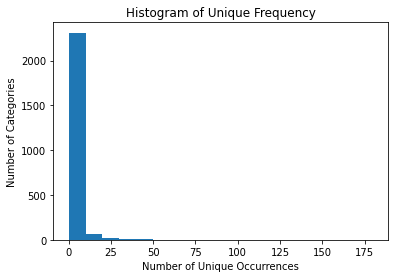

In [ ]:
histTmp = pd.DataFrame()  #Create df for storage
histTmp = df['Category'].value_counts() #Store values in the tmp df

plt.hist(histTmp, bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180]) #Plot the histogram
plt.xlabel('Number of Unique Occurrences')    #Set X label
plt.ylabel('Number of Categories')            #Set Y label
plt.title('Histogram of Unique Frequency')    #Set a title
plt.show()                                    #Remove plot formatting

## Correlation (5 pts, 1 pt each)
Try making different correlation matrices - when you have more than 10 variables it can be hard to read, so let's start big and then simplify. 

* make one for the entire dataset (this one should be hard to read)
* make four more correlation matrices that only contain:
  * fat-related
  * major minerals-related
  * vitamins-related
  * none of the above ('Alpha Carotene' through and including 'Water')

Describe what you see. You are welcome to color-code these plots so they are easy to read.

# Correaltion for the enitre Dataset

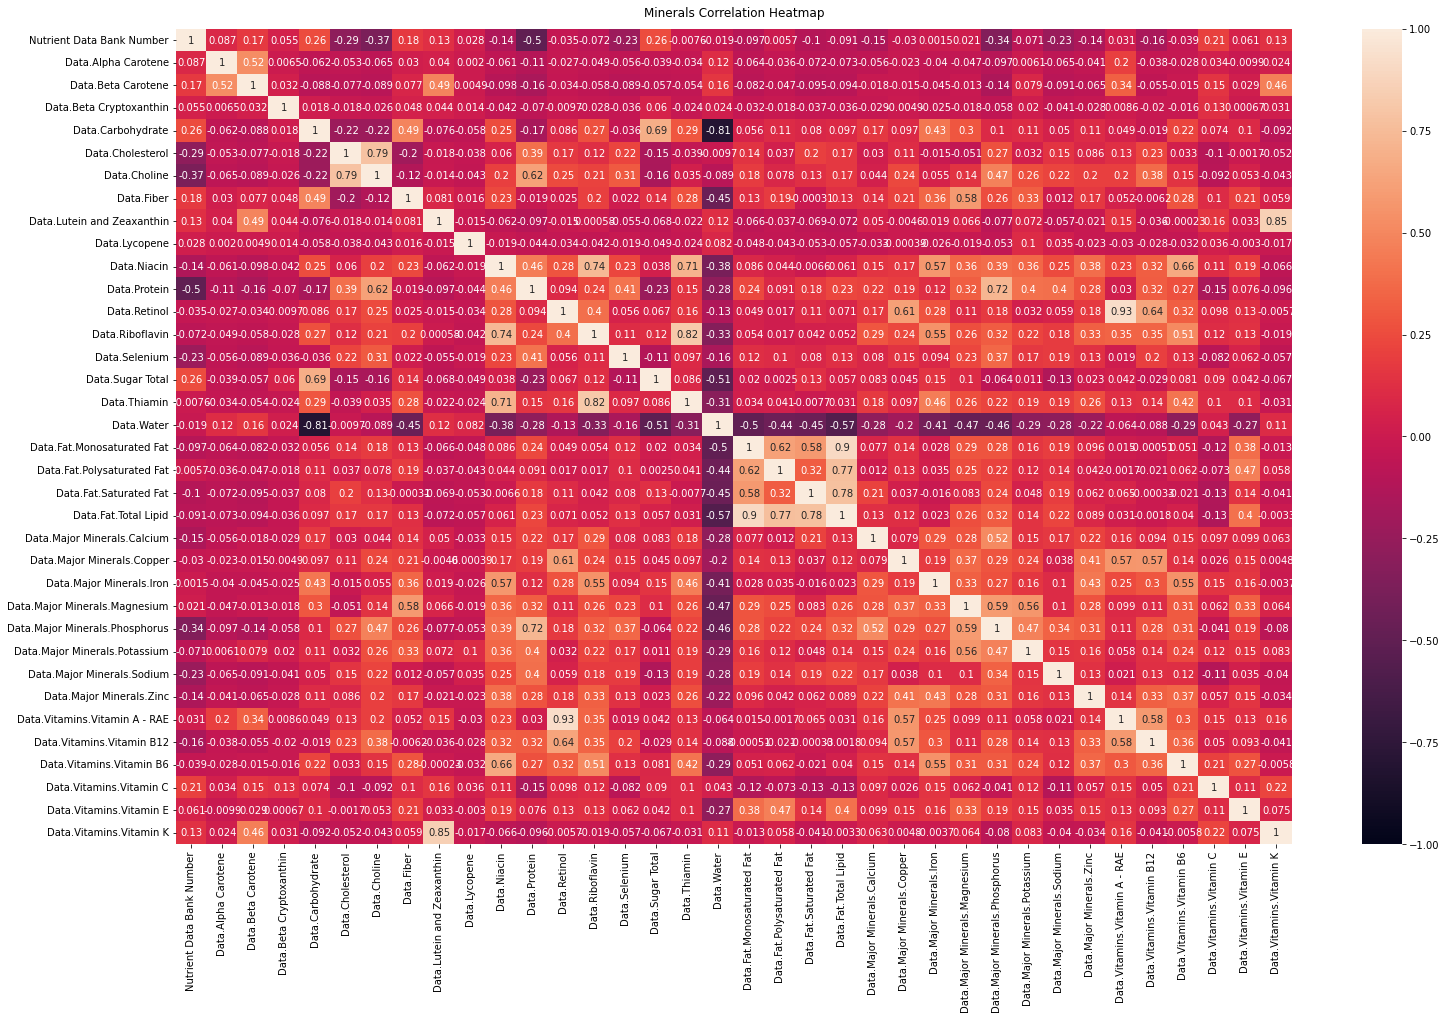

In [ ]:
plt.figure(figsize = (25,15)) # This is used to set the size of the entire dataset
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True) # This is used to draw a heat map for the Minerals Dataset and the scale as been set and the annotation is also done.  
heatmap.set_title('Minerals Correlation Heatmap', fontdict={'fontsize':12}, pad=12) # This is used to set the title for the correlation heatmap and the fontsize is also set. 
plt.show() # Display the Heatmap. 

##Inference
We have done correlation for the entire dataset and as expected the interpretation of the correaltion matrix was very difficult. 

Dark blue color shows that the values highly correlated. 

Light Orange color shows that the Values are highly correlated with each other.

#Correlation of the Minerals Dataset.

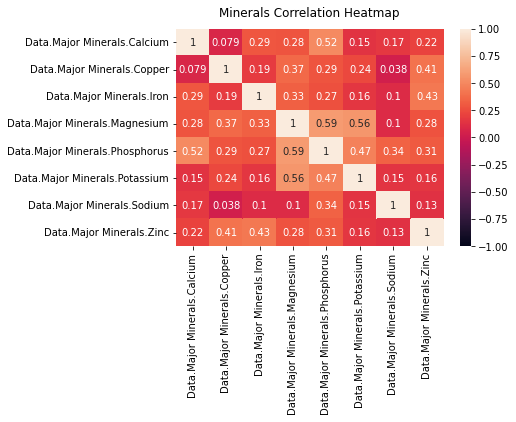

In [ ]:
Minerals = df.iloc[:,24:32] # Subsetted the minerals from the dataset and termed it as Minerals using this command. 
Minerals.head() # This is used to find the first five rows of the Minerals dataset. 
Minerals.corr() # This is used to find the correaltion of the Minerals. 
heatmap = sns.heatmap(Minerals.corr(), vmin=-1, vmax=1, annot=True) # This is used to draw a heat map for the Minerals Dataset and the scale as been set and the annotation is also done.  
heatmap.set_title('Minerals Correlation Heatmap', fontdict={'fontsize':12}, pad=12) # This is used to set the title for the correlation heatmap and the fontsize is also set. 
plt.show() # Display the Heatmap. 

##Inference
Phosphorus is moderately correlated with Potassium and Calcium. 

Other constituents doesn't have any significant correlation with each other. 

#Correlation matrix of Fat Dataset

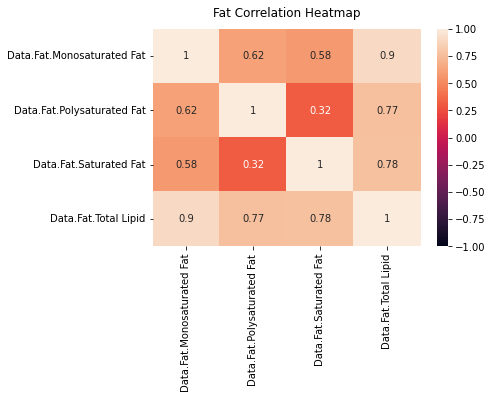

In [ ]:
Fat = df.iloc[:,20:24] # Subsetted the Fat contents from the main dataset and termed the dataset as Fat
Fat.head() # This is used to find the first five rows of the Fat dataset. 
Fat.corr() # This is used to find the correlation of all the components of the Fat Dataset
heatmap = sns.heatmap(Fat.corr(), vmin=-1, vmax=1, annot=True) # This is used to build a heatmap and the scale is set and the annotation is also done. 
heatmap.set_title('Fat Correlation Heatmap', fontdict={'fontsize':12}, pad=12) # this is used to set the title for the heatmap and set the font size of the number that are inside the heatmap. 
plt.show() # This is used to display the heatmap. 

##Inference
Total Lipid is highly correlated with Monosaturated Fat, Polysaturated Fat and Daturated Fat. 

#Correlation matrix for Vitamins

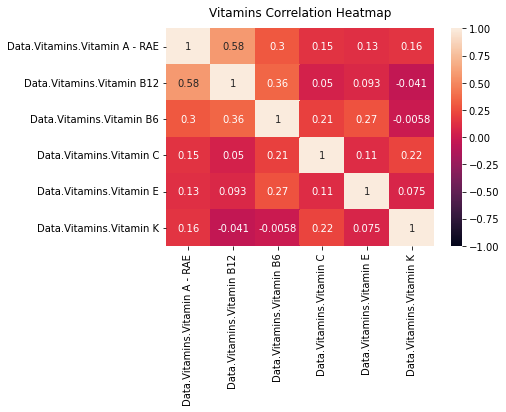

In [ ]:
Vitamins = df.iloc[:,32:38] # Subsetted the Vitamins from the Main dataset and named the dataset as Vitamins.
Vitamins.head() # this is used to find the top five rows in the Viatmins dataset. 
Vitamins.corr() # Find the correlation of all the components of the Vitamins table. 
heatmap = sns.heatmap(Vitamins.corr(), vmin=-1, vmax=1, annot=True) # This is used to build the heatmap and scale has been set and annotation is also done. 
heatmap.set_title('Vitamins Correlation Heatmap', fontdict={'fontsize':12}, pad=12) # This is used to set the title for the correlation heatmap and set the font size of the numbers in the heatmap. 
plt.show() # This is used to show the Heatmap. 

##Inference
Vitamin A and Vitamin B12 are moderately correlated. 

Other Vitamin are sigbificantly not correlated with each other. 

#Correlation matrix for the Dataset that constitutes components other than Fat, Vitamins and Minerals. 

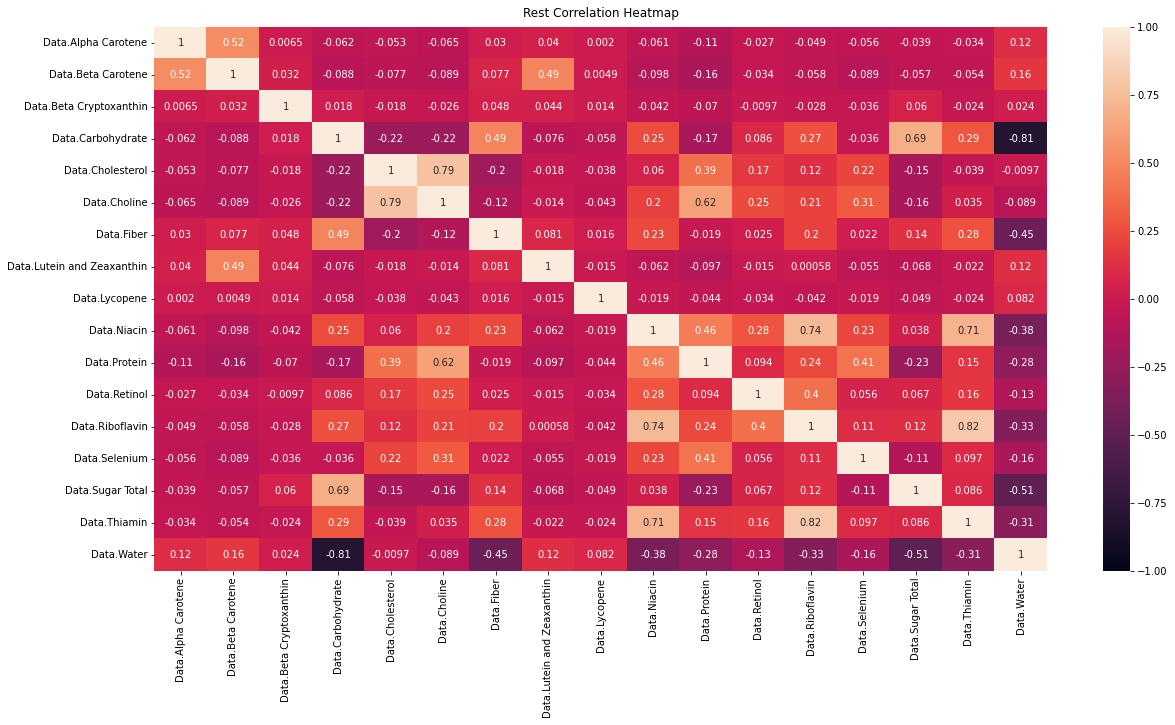

In [ ]:
Rest = df.iloc[:,3:20] # Subsetted all the other Attributes other than minerals, Vitamins and Fat. Termed this dataset as Rest
Rest.head() # find the first 5 columns of the the rest dataset. 
Rest.corr() # To find the correlation of attributes of the Rest dataset. 
plt.figure(figsize = (20,10)) # This is used to set the size of the Heatmap. 
heatmap = sns.heatmap(Rest.corr(), vmin=-1, vmax=1, annot=True)# Find the correlation heatmap of the rest Dataset. 
heatmap.set_title('Rest Correlation Heatmap', fontdict={'fontsize':12}, pad=10)# Used to set the title and fontsize. 
plt.show() # used to show the plot. 

##Inference 

Sugar and Cholestrol are Moderately correlated 

Cholestrol and Choline are highly correlated.

Niacin is correlated with Niacin and Riboflavin. 

protein and Choline are moderately correlated. 



## Feature Engineering: Net Carbs (5 pts)
Read this article.
* https://www.trifectanutrition.com/blog/how-to-calculate-net-carbs-for-keto-in-2-simple-steps

* Calculate a new feature called `NetCarbs`. (1 pt)
* Is there any relationship between net carbs and cholesterol? Use a plot or table to prove your point. (2 pt)
* Which foods have the lowest net carbs? Which foods have the highest net carbs? What do these foods have in common. (2 pt) 

Support your answer with analysis completed in Python, not just lit review.

#Netcarbs 
The Netcarbs of a category are the difference between the carbohydrate and Fiber content of that category.

In [ ]:
# calculation of the Netcarb which is the subtraction of Dietary Fiber from Total carb content 
df['Netcarbs'] = df['Data.Carbohydrate'] - df['Data.Fiber'] 
df.head() # This is used to show the top five rows of a df dataset. 

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Netcarbs
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3,6.89
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2,4.87
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3,4.67
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3,4.46
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3,4.67


#Correlation Matrix of Cholestrol and Netcarbs

In [ ]:
CAC = df.loc[:,["Data.Cholesterol","Netcarbs"]] # Subsetted the columns cholestrol and Netcarbs from Original Dataset. 
CAC.corr() # This is used to find the correlatioon between cholestrol and Netcarbs.


,Data.Cholesterol,Netcarbs
Data.Cholesterol,1.000000,-0.211883
Netcarbs,-0.211883,1.000000


##Inference
Correlation betwen Cholestrol and Netcarbs is low. 

# Scatterplot between Cholesterol and Netcarbs


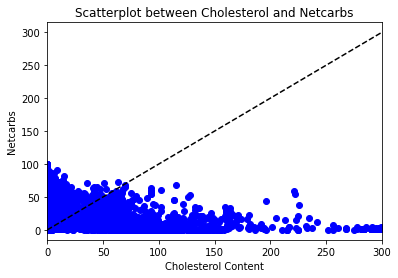

In [ ]:
plt.scatter(df['Data.Cholesterol'], df['Netcarbs'],color='blue') #Scatter plot is built between cholesterol and Netcarbs
plt.plot([0, 300], [0, 300], '--k') # 45 degree line
plt.xlim(0,300) # X axis is limited from 0 to 300. 
plt.xlabel('Cholesterol Content') # labelled x axis. 
plt.ylabel('Netcarbs') # labelled Y axis.
plt.title('Scatterplot between Cholesterol and Netcarbs') # Title was given
plt.show() # To display the plot. 


This scatterplot tells us that even though Cholesterol content is increasing the Netcarbs, which is the carbohydrate abosorbed by our blood is not increasing.

# Categories that have lowest Netcarbs and Highest Netcarbs. 

In [ ]:
Cb = df.groupby("Category")['Netcarbs'].mean() # Avg Netcarbs is calculated for each category
Cb = pd.DataFrame(Cb) # Converted the cb table to a dataframe. 
Cb # This is to display the new Dataframe. 

,Netcarbs
Category,
100 GRAND Bar,69.970000
3 MUSKETEERS Bar,76.270000
3 Musketeers Truffle Crisp Bar,63.150000
Abalone,11.386667
Adobo,8.220000
...,...
Zombie,9.150000
Zucchini,6.640000
Zucchini lasagna,11.530000


In [ ]:
Cb.nlargest(10, 'Netcarbs') #Show the 10 highest in terms of netcarbs

,Netcarbs
Category,
Sugar substitute and sugar blend,99.350000
Strawberry beverage powder,99.100000
Dietetic or low calorie hard candy,98.600000
Dietetic or low calorie mints,98.600000
Sugar,98.326000
Candy,98.000000
Hard candy,98.000000
Licorice,93.350000
Chewing gum,93.223333


In [ ]:
column = Cb["Netcarbs"] # Subsetted the column Netcarbs from the cb dataset.
max_index = column.idxmax() # Found the index of the maximum value of the Netcarbs.
max_index # To show the category that have the highest NetCarbs

'Sugar substitute and sugar blend'

In [ ]:
column = Cb["Netcarbs"] # Subsetted the column Netcarbs from the cb dataset.
min_index = column.idxmin() # Found the index of the minimum value of the Netcarbs.
min_index # To show the category that have the Lowest NetCarbs

'Almond oil'

## Inference
Sugar substitute and sugar blend food has the Highest Net carbs  

Almond oil Food category has the lowest Net carbs. 

#Difference between the Sugar Substitute and sugar blend and Almond oil. 

In [ ]:
SSAO = df.loc[(df['Category'] == 'Sugar substitute and sugar blend') | (df['Category'] =='Almond oil')] # This is used to create a dataset that has only Sugar and almond oil.
SSAO.iloc[:,0:20] # Subsetted to see the first 20 columns

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water
6346,Almond oil,Almond oil,82101300,0,0,0,0.00,0,0.4,0.0,0,0,0.0,0.0,0,0.000,0.0,0.00,0.0,0.00
6427,Sugar substitute and sugar blend,Sugar substitute and sugar blend,91106010,0,0,0,99.35,0,0.0,0.0,0,0,0.0,0.0,0,0.018,0.6,99.22,0.0,0.28


In [ ]:
SSAO.iloc[:,21:40] # Subsetted to see the first 20 columns

,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Netcarbs
6346,17.4,8.2,100.00,0,0.000,0.00,0,0,0,0,0.00,0,0.0,0.0,0.0,39.2,7.0,0.00
6427,0.0,0.0,0.31,1,0.007,0.05,0,0,2,1,0.01,0,0.0,0.0,0.0,0.0,0.0,99.35


##Inference
Both Sugar Substitute and sugar blend and Almond oil doesn't have Alpha carotene, Beta carotene, Beta Cryptoxanthin, cholesterol, Fiber, Lutein and Zeaxanthin, Lycopene, Niacin,Protein, Retinol, Thiamin, Magnesium, Phosphorus, Vitamin A, B12, B6, C. 

As per the data they donot have any component that they both have.

# Advanced EDA (10 pts, 2 pts per item)
This is your chance to show-off your data analysis skills. Create a total of five compelling tables and visualizations (2 pts each) to show you understand how to make amazing plots and tables. You should have two or three tables and two or three visualizations.

Each item you create should have a nice sub-header, the figure or table, and then a nice caption which relates back to your theme of cholesterol. Don't just rattle of a bunch of plots for the sake of making plots - do a great job here. You can use your lit review to motivate the creation of these plots and tables.

## Scatterplot 
This plot tells the relation between cholestrol and Choline content in a particular category 

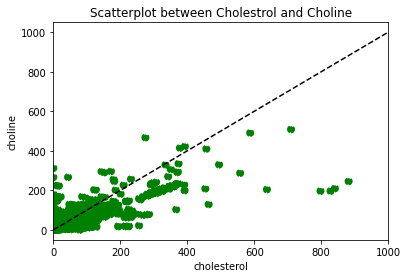

In [ ]:
plt.scatter(df['Data.Cholesterol'], df['Data.Choline'],color='green', lw=2, ls='--') # This is used to find the relation between Cholestrol and Choline content. 
plt.plot([0, 1000], [0, 1000], '--k') # 45 degree line
plt.xlim(0,1000) # Limited the x axis 
plt.xlabel('cholesterol') # Labelled the X axis. 
plt.ylabel('choline') # labelled Y axis
plt.title('Scatterplot between Cholestrol and Choline') # gave title to the scatterplot
plt.show() # To show the graph. 

###Inference
From this graph we have say that both cholestrol and choline are positively correlated. 

The relationship between Chloestrol and Choline is depicted in this graph. Because cholestrol is the most hazardous to one's health, understanding the components that make up the most cholestrol is critical, and this graph is valuable for both manufacturers and users.. 

##Table 1
This is table is showing the Mineral, Vitamins and Fat Content in each category of food. 
This table instructs a person which Category item to choose and which Category item to avoid based on the content and their specific needs. It essentially provides a broad overview of a product's contents based on the category.

In [ ]:
#Calculated the sum of all the minerals for each category and stored the value in a new column Total Minerals Content. 
df['Total Minerals Content'] = df.iloc[:,24] + df.iloc[:,25] + df.iloc[:,26] + df.iloc[:,27] + df.iloc[:,28] + df.iloc[:,29] + df.iloc[:,30] + df.iloc[:,31] 
#Calculated the sum of all the Vitamins for each category and stored the value in a new column Total Vitamins Content. 
df['Total Vitamins Content'] = df.iloc[:,32] + df.iloc[:,33] + df.iloc[:,34] + df.iloc[:,35] + df.iloc[:,36] + df.iloc[:,37] 
#Calculated the sum of all the Fat for each category and stored the value in a new column Total Fat Content. 
df['Total Fat Content'] =  df.iloc[:,20] + df.iloc[:,21] + df.iloc[:,22] + df.iloc[:,23]
df.head() # This is used to see the show the first five rows
Tdf = df.loc[:,['Category','Total Minerals Content','Total Vitamins Content','Total Fat Content']] #
Tdf.head()

,Category,Total Minerals Content,Total Vitamins Content,Total Fat Content
0,Milk,117.252,66.441,8.544
1,Milk,437.421,59.950,3.645
2,Milk,424.411,32.951,5.856
3,Milk,448.440,30.674,6.741
4,Milk,424.411,32.951,5.856


In [ ]:
Tdfdesc = Tdf.groupby('Category').mean() # This is used to find the average Minerals, Vitamins and Fat Content for each group of category
Tdfdesc.head()

,Total Minerals Content,Total Vitamins Content,Total Fat Content
Category,,,
100 GRAND Bar,554.515000,45.626000,38.657000
3 MUSKETEERS Bar,480.375000,24.255000,24.085000
3 Musketeers Truffle Crisp Bar,728.101000,53.028000,54.707000
Abalone,1441.224333,53.733333,10.897667
Adobo,918.720500,4.973000,14.865000


In [ ]:
Tdf.describe() #This command is used to find the summary statistics of the Tdf dataset. 

,Total Minerals Content,Total Vitamins Content,Total Fat Content
count,7083.000000,7083.000000,7083.000000
mean,795.159591,95.031549,17.144574
std,573.761447,261.526752,21.430469
min,0.000000,0.000000,0.000000
25%,443.381000,13.038500,3.796500
50%,720.731000,36.256000,10.362000
75%,1029.233000,78.499000,24.013500
max,9732.266000,9439.709000,198.783000


###Inference
This tables gives a idea of the total Mineral, Vitamins and Fat Contents in each group of category.  

Summary statistics of our table shows that the food categories has Total Minerals Content on an average of 795.15 units, Total Vitamins Content on an average of 95 units, and  Total Fat Content on an average of 17.14 units.

##Scatterplot 
This scatterplot shows the relation between Total Mineral,Vitamins and Fat VS Cholestrol. 

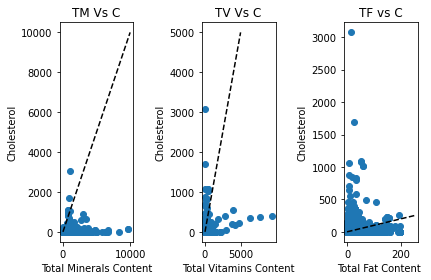

In [ ]:
#Scatterplots of Total Minerals, Vitamins, Fat results vs Cholesterol
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# fig.suptitle('Scatterplots of Total Minerals, Vitamins, Cholesterol') #title of the figure
ax1.scatter(df['Total Minerals Content'], df['Data.Cholesterol']) #scatterplot of Total Mineral and Cholesterol content
ax1.plot([0, 10000], [0, 10000], '--k') # 45 degree line
ax1.set_title('TM Vs C') # sub title
ax2.scatter(x=df['Total Vitamins Content'], y= df['Data.Cholesterol']) #scatterplot of Total Vitamins and Cholesterol content
ax2.plot([0, 5000], [0, 5000], '--k') # 45 degree line
ax2.set_title('TV Vs C') # sub title
ax3.scatter(x=df['Total Fat Content'], y= df['Data.Cholesterol']) #scatterplot of Total Fat and Cholesterol content
ax3.plot([0, 250], [0, 250], '--k') # 45 degree line
ax3.set_title('TF vs C') # sub title

ax1.set(xlabel='Total Minerals Content', ylabel='Cholesterol') #labeling the sublots
ax2.set(xlabel='Total Vitamins Content', ylabel='Cholesterol') #labeling the sublots
ax3.set(xlabel='Total Fat Content ', ylabel='Cholesterol') #labeling the sublots
fig.tight_layout()
plt.show() # to avoid the single line text

###Inference 
We can see that for high mineral content, Cholesterol is low, which is good. We can also see that food with low vitamin content is having high cholesterol and the relationship between Cholesterol and Fat is not that pronounced.



##Scatterplot
This Scatterplot shows the relation between Total Minerals,Vitamins and Fat VS Netcarbs. 

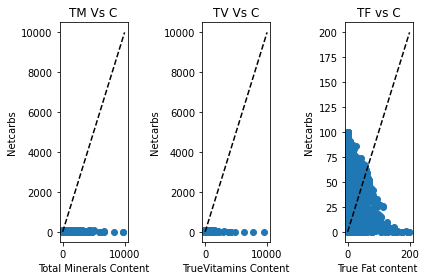

In [ ]:
#Scatterplots of Total Minerals, Vitamins, Fat results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# fig.suptitle('Scatterplots of Total Minerals, Vitamins, Fat with Netcarbs') #title of the figure
ax1.scatter(df['Total Minerals Content'], df['Netcarbs']) #scatterplot of Total Mineral and carbohydrate content
ax1.plot([0, 10000], [0, 10000], '--k') # 45 degree line
ax1.set_title('TM Vs C') # sub title
ax2.scatter(x=df['Total Vitamins Content'], y= df['Netcarbs']) #scatterplot of Total Vitamins and carbohydrate content
ax2.plot([0, 10000], [0, 10000], '--k') # 45 degree line
ax2.set_title('TV Vs C') # sub title
ax3.scatter(x=df['Total Fat Content'], y= df['Netcarbs']) #scatterplot of Total Fat and carbohydrate content
ax3.plot([0, 200], [0, 200], '--k') # 45 degree line
ax3.set_title('TF vs C') # sub title

ax1.set(xlabel='Total Minerals Content', ylabel='Netcarbs') #labeling the sublots
ax2.set(xlabel='TrueVitamins Content', ylabel='Netcarbs') #labeling the sublots
ax3.set(xlabel='True Fat content ', ylabel='Netcarbs') #labeling the sublots
fig.tight_layout()
plt.show() # to avoid the single line text

###Inference 
We can infer from the scatterplots that the food which are having high mineral content and high vitamin content are having low Netcarbs. Surprisingly, food which has low fat has high Netcarb and vice versa. We researched that flour, white and whole-wheat bread, pasta, breakfast cereal, barley, oatmeal, rice and other grains has low fat and high Netcarb.

##Boxplot
This graphs tells us the outliers in the Total Minerals Content, Total Minerals Content and Total Fat Content columns. Finding the outliers in a columns hwlps in modelling.

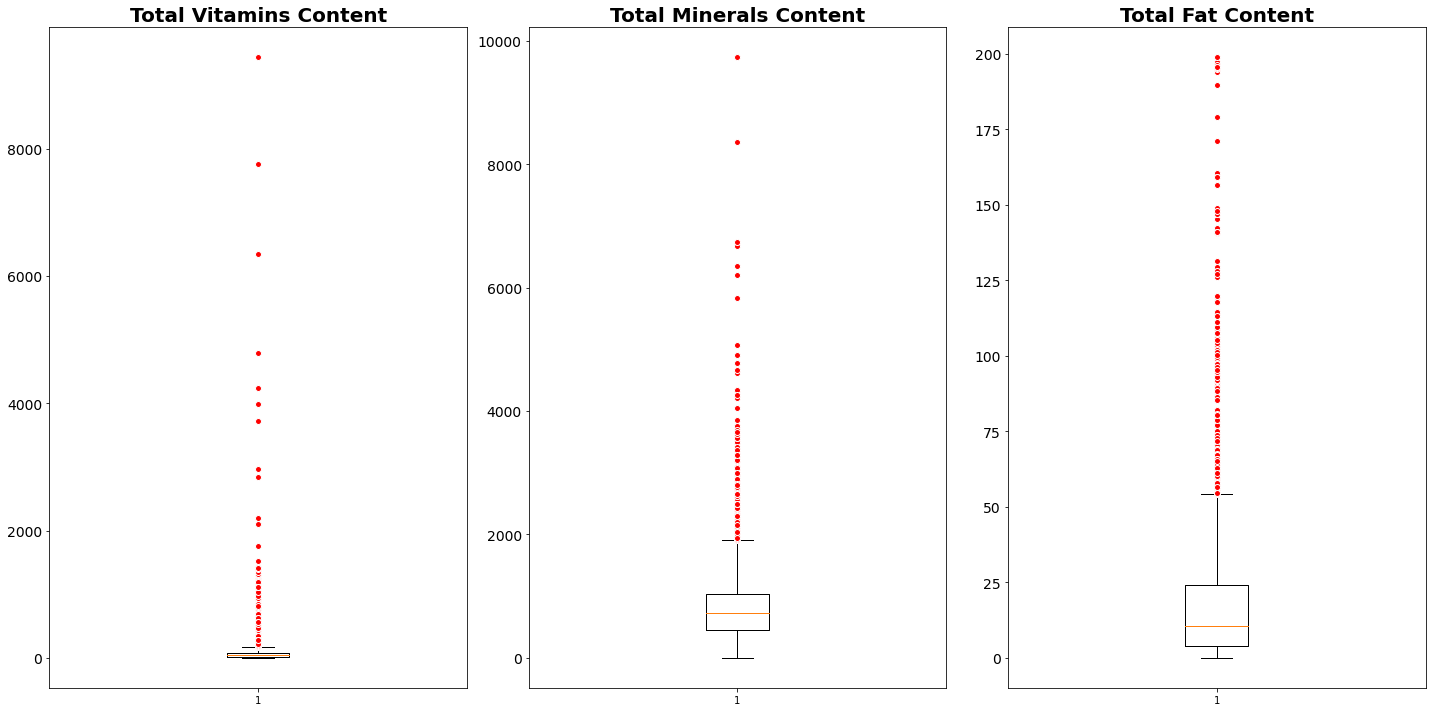

In [ ]:
df1 = df.loc[:,['Total Vitamins Content','Total Minerals Content','Total Fat Content']] # Subsetted the columns Total Vitamins, Minerals and Fat Content from the original dataset
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white') # Defined outliers as red underscore circles. 
fig, axs = plt.subplots(1, len(df1.columns), figsize=(20,10)) #define fig, axs as plt.subplots

for i, ax in enumerate(axs.flat): #using the enumerate function 
    ax.boxplot(df1.iloc[:,i], flierprops=red_circle) #added boxplot and specified outliers as red_circle. 
    ax.set_title(df1.columns[i], fontsize=20, fontweight='bold')#Title assigned.
    ax.tick_params(axis='y', labelsize=14)    
plt.tight_layout()# To space out the plots in nice way. 

###Inference 
We can see that there are many outliers in Total vitamins content. There are also outliers in the Total Minerals content and total Fat content but comparatively less than that of Total Vitamins content.

##Table 2
Here in this Table we have calculated the Total fat,cholestrol and Netcarbs and created as one column. In other column we have calculated the sum of minerals, Vitamins and Water Content. We then classified the products as healthy products which has the low Total fat,cholestrol and Netcarbs and high minerals,Vitamins and Water content. This tables shows all the healthy products, which helps the consumers who want to choose healthy products as their option. 

In [ ]:
# Calculated the sum of carbohydrates, Netcarbs,Sugar and Total Fat Content respectively and created a new column and stored this value and termed that column as Unhealthy Content
df['Total Unhealthy content'] = df.iloc[:,7] + df.iloc[:,38] + df.iloc[:,17] + df['Total Fat Content']
# Calculated the sum of Water, Total Minerals Content and Total Vitamins Content respectively and created a new column and stored this value and termed that column as healthy Content
df['Total healthy content'] = df.iloc[:,19] + df['Total Minerals Content'] + df['Total Vitamins Content']
#Created a new column 'Healthy products' and termed those value as Unhealthy from the 'Total unhealthy content' column, which values are greater than the median value and Vice versa. 
df['Healthy products'] = np.where(df['Total Unhealthy content'] > np.median(df['Total Unhealthy content']), "Unhealthy Product", "Healthy product")
#Created a new columns 'Unhealthy products' and termed those value as healthy from the 'Total healthy content' column, which values are greater than the median value and Vice versa. 
df['Healthy products2'] = np.where(df['Total healthy content'] > np.median(df['Total healthy content']), "Healthy Product", "Unhealthy product")
df.head() # show the top Five rows. 



,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Netcarbs,Total Minerals Content,Total Vitamins Content,Total Fat Content,Total Unhealthy content,Total healthy content,Healthy products,Healthy products2
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,0.08,0.3,6.89,117.252,66.441,8.544,36.324,271.193,Healthy product,Unhealthy product
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,0.03,0.2,4.87,437.421,59.950,3.645,21.405,586.411,Healthy product,Unhealthy product
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,0.05,0.3,4.67,424.411,32.951,5.856,27.336,545.462,Healthy product,Unhealthy product
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,0.08,0.3,4.46,448.440,30.674,6.741,29.661,567.314,Healthy product,Unhealthy product
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,0.05,0.3,4.67,424.411,32.951,5.856,27.336,545.462,Healthy product,Unhealthy product


In [ ]:
HOUH = df.loc[:,['Category','Healthy products','Healthy products2']] # Subsetted the columns Healthy prodcuts and Healthy products2 and Named that table as HOUH
HOUH.head() # Display the first five rows. 

,Category,Healthy products,Healthy products2
0,Milk,Healthy product,Unhealthy product
1,Milk,Healthy product,Unhealthy product
2,Milk,Healthy product,Unhealthy product
3,Milk,Healthy product,Unhealthy product
4,Milk,Healthy product,Unhealthy product


In [ ]:
# We have created a new dataset of the categories which are termed as the healthy products in both the columns "Heathy products" and "Heathly products2"
Healthy_products = df["Category"][(df["Healthy products"] == 'Healthy product') & (df["Healthy products2"] == 'Healthy Product')]
#Converted to dataframe 
Healthy_products = pd.DataFrame(Healthy_products)
# Renamed the Category column to Healthy products
Healthy_products = Healthy_products.rename(columns={'Category': 'Healthy Products'})
#Found the unique values in the Healthy_products dataset
df1 = pd.DataFrame(Healthy_products['Healthy Products'].unique())
#Renamed the column and termed it as the Heathly products. 
df1 = df1.rename(columns={0: 'Healthy Products'})
df1 # To show the dataset. 

,Healthy Products
0,Milk
1,Chipotle dip
2,Dill dip
3,Onion dip
4,Ranch dip
...,...
391,Nutritional powder mix (Isopure)
392,Nutritional powder mix (Kellogg's Special K20 ...
393,Wheat bread as ingredient in sandwiches
394,Wheat bun as ingredient in sandwiches


###Inference
This table gives the products that are healthy i.e that have high mineral,Vitamins and water Contents and that have less Fat, Cholestrol, sugar and Netcarbs contents. 

Milk, Nutritional Powder, bun etc are healthy products. 

## Bar Plot 
This Plot shows the cholestrol content for Milk category for each description. This bar plot gives a clear idea of the milk that have high cholestrol and low cholestrol content. A person choosing a milk can choose accordinly based on their preference. They choose Milk based on the cholestrol content from this graph. 

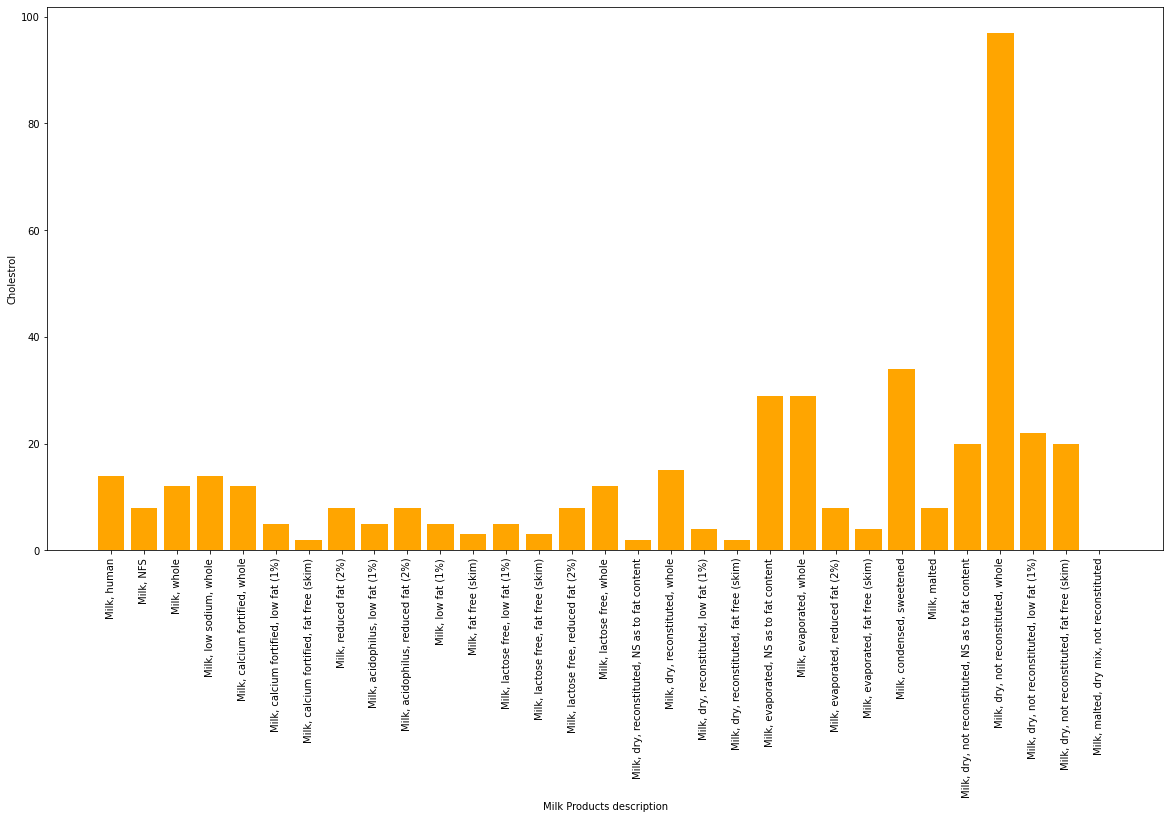

In [ ]:
Milk_Products = df[df["Category"] == 'Milk'] # Subsetted the rows that are Milk category 
Milk_Products
plt.figure(figsize = (20,10)) # Set the size of the bar plot. 
plt.bar(Milk_Products['Description'], Milk_Products['Data.Cholesterol'], color = "Orange") # Command is used to draw a bar plot. 
plt.xticks(rotation=90) # Rotated the x labels with rotation 90. 
plt.xlabel('Milk Products description') # Labelled x axis. 
plt.ylabel('Cholestrol') # Labelled Y axis.
plt.show()

###Inference
Dry,not constituted whole milk has the highest cholestrol content and can be termed as very harmful kind of milk based on the bar plot. 

Condensed and sweetened milk, evaporated,Ns as to fat content milk and milk 

evaporated whole also have high cholestrol content compared to other milk. 

##Table 3 
This Table hows the avg Net carbs for the different types of Milk products. This will help in differentiating the Milk products based on the Net carbs and help choose the required milk product based on the Net carbs contents.

In [ ]:
df1 = df[df['Category'].str.contains('ilk')] # Subsetted the category with ends with ilk since we wanted to subset milk products.  
df1
df2=df1.groupby('Category').Netcarbs.mean() # calculated the average mean of the of the mean products for each group of milk category. 
df2
df3 = pd.DataFrame(df2) # Converted The dataset into Dataframe
df3 # To see this dataset df3. 


,Netcarbs
Category,
Almond milk,3.842500
Buttermilk,4.940000
Chocolate milk,9.200980
Chocolate milk drink,10.080000
Coconut milk,3.130000
Cornmeal beverage with chocolate milk,20.480000
Goat's milk,4.450000
M&M's Milk Chocolate Candies,68.390000
Milk,15.884194


###Inference 
From this table we found that Milk Chocolate Candies, Milk Cereal bar, Milk chocolate candy, Milk dessert or milk candy, Nutrition bar has very high Crabohydrate contents and We can also infer that this product is not suggested for a person who is looking to loose his or her weight. This products might be harmful from the health perspective as well. 

# Data Splitting (2 pts)
Use an 80/10/10 split for train, test and validation. Use your group number as a random_seed so that you always will get the same modeling results.

How to get the test partition? Do a 50/50 split on the val partition and overwrite! 

Optional: You will likely want to make a copy of the metadata columns for each partition... you can call this X_train_meta, X_test_meta... just keep the first few columns of X_train and X_test.

We read the data again, as we want to do the modeling on the original data set

## Reading the original data

In [ ]:
# we read the data again, as we want to do the modeling on the original data set
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df.head() # print its head

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


Took a subset of the data and did not consider the object type columns as they won't contribute towards predicting cholestrol variable by Linear Regression.

In [ ]:
#Here we randomly sample the data! 
tmp = df.sample(frac = .9, replace = False, random_state = 14)

In [ ]:
#replace the original data frame with the sampled one
df=tmp

## Subset

In [ ]:
#Subset
df=df.iloc[:,3:] 

We subset the data and get rid of the categorical columns.

In [ ]:
# subsetting the whole data set for prediction
y = df['Data.Cholesterol'] # separate the target variable
print(y.shape)
X = df.drop(['Data.Cholesterol'], axis=1) # separate the predictor variables
print(X.shape)

(6375,)
(6375, 34)


We separated our predictor variables and the target variables.

## Partitioning

In [ ]:
# partitioning the data set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 14) # partition into 80:20 ratio to train and test for both predictor and target variables
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=14) # partition the test data set in 50:50 ratio to validation and test data sets
print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(5100, 34)
(5100,)
(638, 34)
(638,)
(637, 34)
(637,)


(None, None)

We partition our data set into 80/10/10 ratio. We then convert our data frames to arrays before proceeding with scaling.

In [ ]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
# # Subset
# X_train_1=X_train[:,3:] 
# X_val_1=X_val[:,3:] 
# X_test_1=X_test[:,3:] 


In [ ]:
#X_train_1

## Min Max Scaler

We use MinMaxScaler to transform features by scaling each feature to a specific range of [0,1].

In [ ]:
scaler = MinMaxScaler()
# train the transformation
X_train = scaler.fit_transform(X_train)
# take that coordinate system on X_train, and APPLY it to X_val
X_val = scaler.transform(X_val)
# take that coordinate system yon X_train, and APPLY it to X_test
X_test = scaler.transform(X_test)

In [ ]:
tmp1 = pd.DataFrame(X_train) # convert the train dataset to data frame to see it's statistic
tmp1.describe() # all the max values are 1, all min values are 0.

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,...,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000
mean,0.009003,0.018108,0.002605,0.205460,0.056677,0.037061,0.013787,0.005883,0.047736,0.111558,...,0.095016,0.062149,0.048517,0.012896,0.007760,0.009748,0.016453,0.021123,0.007300,0.008564
std,0.054451,0.071679,0.021972,0.216941,0.069606,0.057009,0.065291,0.026356,0.066374,0.107548,...,0.091361,0.053715,0.050374,0.029272,0.024653,0.032885,0.031706,0.052531,0.022420,0.033816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.054200,0.016340,0.002165,0.000000,0.000000,0.009882,0.028542,...,0.034290,0.032205,0.017931,0.003642,0.000214,0.000000,0.004417,0.000000,0.001539,0.000488
50%,0.000000,0.000495,0.000000,0.131950,0.032353,0.021645,0.001185,0.000000,0.027303,0.079739,...,0.072078,0.052556,0.044542,0.006980,0.002136,0.002499,0.009250,0.002684,0.003614,0.002256
75%,0.000215,0.005165,0.000520,0.254525,0.074183,0.045996,0.005333,0.000000,0.062227,0.158710,...,0.133660,0.077978,0.064323,0.013883,0.006515,0.007775,0.016833,0.019939,0.007430,0.005671
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
tmp1 = pd.DataFrame(X_val) # convert the validation dataset to data frame to see it's statistic
tmp1.describe() # all the max values are 1, all min values are 0.

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,...,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,0.009367,0.019259,0.002500,0.207490,0.058103,0.034893,0.018763,0.005193,0.053713,0.108377,...,0.088529,0.063072,0.045787,0.013858,0.008942,0.010378,0.016862,0.025593,0.006190,0.009857
std,0.051163,0.067779,0.014700,0.222312,0.086621,0.047304,0.087374,0.022588,0.114186,0.107294,...,0.086325,0.088658,0.042797,0.033642,0.037688,0.049719,0.028562,0.099590,0.010644,0.035203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.051775,0.016176,0.002165,0.000000,0.000000,0.008574,0.026654,...,0.031666,0.031134,0.012381,0.003262,0.000107,0.000000,0.004188,0.000000,0.001406,0.000366
50%,0.000000,0.000495,0.000000,0.130250,0.032516,0.023810,0.001119,0.000000,0.025944,0.076091,...,0.067530,0.052271,0.043048,0.006777,0.001709,0.002360,0.009167,0.002684,0.003481,0.002165
75%,0.000215,0.005147,0.000520,0.270825,0.069690,0.045455,0.004460,0.000000,0.062910,0.151158,...,0.129461,0.076121,0.062011,0.013327,0.006595,0.007219,0.017646,0.022143,0.007145,0.005366
max,0.700537,0.772605,0.254943,0.996000,1.340196,0.487013,1.029890,0.273714,2.324606,1.000000,...,0.924423,1.725221,0.481002,0.674691,0.820143,1.144523,0.312500,2.147239,0.141365,0.345488


In [ ]:
tmp1 = pd.DataFrame(X_test) # convert the test dataset to data frame to see it's statistic
tmp1.describe() # all the max values are 1, all min values are 0.

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.010918,0.016349,0.002423,0.222653,0.057988,0.036926,0.009861,0.005029,0.049495,0.105639,...,0.088053,0.062449,0.049356,0.014069,0.008005,0.010438,0.017318,0.023748,0.007887,0.007451
std,0.061977,0.068752,0.012835,0.226834,0.084175,0.054296,0.041079,0.022272,0.081078,0.101852,...,0.079958,0.068329,0.045718,0.034221,0.030237,0.038519,0.036222,0.071326,0.018591,0.026963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.066000,0.018137,0.004329,0.000000,0.000000,0.008733,0.026494,...,0.032890,0.028849,0.016650,0.003338,0.000214,0.000000,0.004083,0.000000,0.001473,0.000671
50%,0.000000,0.000495,0.000000,0.146400,0.033333,0.021645,0.001119,0.000000,0.027676,0.079995,...,0.069279,0.051128,0.045112,0.007182,0.002136,0.002638,0.008667,0.002684,0.003748,0.002500
75%,0.000215,0.004740,0.000520,0.293600,0.067157,0.045455,0.005596,0.000000,0.062682,0.145527,...,0.128062,0.074264,0.066458,0.013656,0.006515,0.007219,0.016750,0.018405,0.007564,0.005793
max,0.746939,0.738149,0.248699,0.991000,1.068954,0.411255,0.716176,0.276676,1.258022,0.713042,...,0.801959,1.009712,0.521987,0.522962,0.668055,0.637096,0.575000,0.793712,0.310241,0.528354


# Modeling (Regression) (10 pts)
Use subheaders to keep your notebook really organized!

Can you predict Cholesterol from the other nutrition variables?

1. Model1: Fit a very basic linear regression model (vanilla)
2. Model2: Show off! Use all of your pre-processing and advanced modeling techniques to build an amazing model. Polynomial features, interaction terms... other?
3. Model3: Same as (1), but drop any records where cholesterol is equal to 0. 
4. Model4: Same as (3), but drop any records where cholesterol is equal to 0.

## Model1 Fit

We fit a Linear Regression Model.

In [ ]:
# make a variable to store the general model
LR = LinearRegression()
# fit the model
LR = LR.fit(X_train, y_train) 

In [ ]:
# storing the predictions
train_preds = LR.predict(X_train) # for the train data set
val_preds = LR.predict(X_val) # for the validation data set
test_preds = LR.predict(X_test)  # for the test data set

In [ ]:
print(train_preds.shape)
print(val_preds.shape)
print(test_preds.shape)

(5100,)
(638,)
(637,)


## Model2 Fit 

In [ ]:
# we read the data again, as we want to do the modeling on the original data set
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df.head() # print its head

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


In [ ]:
#Here we randomly sample the data! 
tmp = df.sample(frac = .9, replace = False, random_state = 14)

In [ ]:
#replace the original data frame with the sampled one
df=tmp

In [ ]:
# Subset
df=df.iloc[:,3:] 

In [ ]:
# subsetting the whole data set for prediction
y = df['Data.Cholesterol'] # separate the target variable
print(y.shape)
X = df.drop(['Data.Cholesterol'], axis=1) # separate the predictor variables
print(X.shape)

(6375,)
(6375, 34)


It has 34 columns. 

### Polynomial Features

To better fit our model and decrease the variance, we try to fit the variables in their quadratic form.

In [ ]:
# polynomial and interaction terms
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2) # squared and raised to second power
X = poly.fit_transform(X)

# store the numpy array into a pd dataframe
X = pd.DataFrame(X)
print(X.shape)  
X.head() 

(6375, 630)


,0,1,2,3,4,5,6,7,8,9,...,620,621,622,623,624,625,626,627,628,629
0,1.0,0.0,34.0,1.0,13.60,14.0,0.3,35.0,0.0,0.130,...,0.000400,0.0320,0.02460,0.7500,2.56,1.968,60.00,1.5129,46.125,1406.25
1,1.0,127.0,6798.0,28.0,7.08,45.0,2.8,10865.0,0.0,0.633,...,0.012996,2.9982,0.14250,70.8282,691.69,32.875,16340.19,1.5625,776.625,386013.69
2,1.0,0.0,1.0,1.0,12.44,46.7,1.5,59.0,0.0,1.492,...,0.080656,2.3856,0.42884,4.3168,70.56,12.684,127.68,2.2801,22.952,231.04
3,1.0,0.0,0.0,0.0,44.60,26.5,3.8,45.0,0.0,4.468,...,0.008464,0.0000,0.00644,0.2852,0.00,0.000,0.00,0.0049,0.217,9.61
4,1.0,0.0,3.0,0.0,22.57,25.2,1.9,3.0,0.0,3.300,...,0.013689,0.0702,0.05616,0.4797,0.36,0.288,2.46,0.2304,1.968,16.81


We can see that the 34 columns has expanded to 630 columns. Although we cannot interpret the columns well, it is good to see the fit

 ### Splitting

In [ ]:
# now we can split and then fit the model!
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X,
                                                        y, 
                                                        test_size=0.2, 
                                                        random_state=14) 
X_test_poly, X_val_poly, y_test_poly, y_val_poly = train_test_split(X_test_poly, y_test_poly, test_size=0.5, random_state=14) # partition the test data set in 50:50 ratio to validation and test data sets
print(X_train_poly.shape), print(y_train_poly.shape)
print(X_val_poly.shape), print(y_val_poly.shape)
print(X_test_poly.shape), print(y_test_poly.shape)

(5100, 630)
(5100,)
(638, 630)
(638,)
(637, 630)
(637,)


(None, None)

In [ ]:
# convert these all to numpy arrays
X_train_poly = np.array(X_train_poly)
X_val_poly = np.array(X_val_poly)
X_test_poly = np.array(X_test_poly)
y_train_poly = np.array(y_train_poly)
y_val_poly = np.array(y_val_poly)
y_test_poly = np.array(y_test_poly)

### Minmax scaling

In [ ]:
# scaling the dataset

scaler = MinMaxScaler()
# train the transformation
X_train_poly = scaler.fit_transform(X_train_poly)
# take that coordinate system on X_train, and APPLY it to X_val
X_val_poly = scaler.transform(X_val_poly)
# take that coordinate system on X_train, and APPLY it to X_test
X_test_poly = scaler.transform(X_test_poly)

### Fitting PCA 

So many columns would result into curse of dimensionality. So we do dimension reduction using PCA.

In [ ]:
pca = PCA(n_components = 0.95) # keeping components that maintain 95% of the variance 
X_train_pca = pca.fit_transform(X_train_poly)

In [ ]:
# Convert the array into dataframe
X_train_pca = pd.DataFrame(X_train_pca)
print(X_train_pca.shape)
X_train_pca.head() #print head of it

(5100, 79)


,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-0.321219,-0.062963,0.100630,0.196923,-0.138981,0.159293,0.453991,-0.105431,-0.054525,-0.005733,...,-0.048944,-0.032559,-0.014964,0.005472,0.015297,0.027298,0.037278,0.005003,0.013709,0.008454
1,-0.503185,-0.436911,-0.035978,0.009052,0.274486,0.063240,-0.055136,0.100871,0.079037,0.083453,...,-0.005378,0.012188,0.014337,-0.000466,-0.005756,0.001214,-0.011519,-0.016983,0.006946,-0.001393
2,-0.000214,0.460335,-0.197514,-0.092130,-0.242107,0.020068,0.034922,0.329202,-0.042125,0.175581,...,-0.001371,-0.012077,0.049654,0.022314,-0.037708,0.058339,-0.079368,0.009120,-0.012375,-0.012460
3,-0.137506,-0.040011,-0.045403,-0.013856,-0.058614,0.254223,-0.104303,-0.180735,-0.177647,-0.017500,...,-0.004988,0.008273,-0.014955,-0.019770,0.023117,-0.010294,-0.001859,-0.024805,0.036166,-0.014797
4,-0.389742,0.456006,0.126107,-0.268809,0.043592,-0.347250,0.059797,-0.333650,0.146978,-0.006009,...,-0.013593,0.037023,0.017001,0.004960,-0.002639,-0.011488,-0.017018,0.005364,0.017910,-0.001854


We can see that 630 columns has reduced to 73 columns.

In [ ]:
# Apply PCA to the val data
X_val_pca = pca.transform(X_val_poly)

In [ ]:
# Convert array into data frame
X_val_pca = pd.DataFrame(X_val_pca)
print(X_val_pca.shape)
X_val_pca.head()

(638, 79)


,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,1.269250,-0.352006,-0.242628,0.239043,0.117522,-0.348105,0.023760,-0.224289,0.018472,0.058934,...,0.087933,-0.032912,0.013419,-0.025331,0.005817,0.054766,-0.064925,-0.060605,-0.018462,0.018951
1,-0.313986,-0.024490,-0.003015,-0.017873,0.026060,0.097782,-0.056631,-0.016395,-0.037331,-0.039464,...,0.005745,-0.001563,-0.011181,0.010400,-0.009784,0.009569,0.007665,-0.006757,0.007353,0.018315
2,-0.164235,0.023084,-0.057893,-0.013375,-0.092228,0.149497,-0.049338,-0.018852,-0.080612,-0.031066,...,0.000074,0.002156,-0.005523,0.000777,-0.000197,0.003104,-0.004845,-0.010373,-0.002984,0.004983
3,-0.156067,0.676876,0.007680,-0.227227,-0.096486,-0.258366,0.097528,-0.161281,-0.071141,0.073055,...,-0.006815,-0.025088,-0.013181,-0.002378,0.019063,-0.007718,0.014783,-0.005803,0.008934,0.014006
4,0.318342,-0.044643,-0.412436,0.030758,-0.261016,0.126706,-0.034460,0.375000,0.145247,0.258280,...,0.019031,0.001347,0.008816,0.021496,-0.009435,0.034210,-0.008175,0.039022,0.009266,-0.006862


In [ ]:
# Apply PCA to the test data
X_test_pca = pca.transform(X_test_poly)

In [ ]:
# Convert array into data frame
X_test_pca = pd.DataFrame(X_test_pca)
print(X_test_pca.shape)
X_test_pca.head()

(637, 79)


,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.967738,-0.521415,-0.382106,0.031948,-0.114425,-0.248759,0.041105,0.002773,0.142119,0.202181,...,-0.041145,0.013494,-0.003122,0.015678,-0.017611,-0.044712,0.039961,0.039247,0.016546,-0.002533
1,0.845600,-0.464632,0.054341,-0.298446,-0.171404,-0.234588,0.021154,-0.259004,-0.226596,-0.330902,...,0.036392,0.059504,0.061356,0.015026,0.032930,0.032465,0.040923,0.039520,-0.023879,0.001467
2,-0.023705,-0.269882,-0.076977,-0.178831,-0.097761,0.258367,-0.124120,-0.131218,0.029816,0.011136,...,-0.007259,-0.000153,-0.026064,0.013467,-0.009867,0.008196,0.003515,0.011978,-0.004271,-0.011617
3,-0.452233,-0.112664,0.011615,-0.065221,0.192607,-0.014127,-0.048531,0.038226,0.156463,-0.080166,...,0.015665,-0.019051,-0.010250,0.022969,0.027028,0.020853,0.003305,-0.007439,0.023529,-0.013257
4,-0.059256,-0.109342,-0.018439,-0.006970,-0.077653,0.348418,-0.141581,-0.269415,-0.198687,-0.063695,...,0.006073,0.015514,-0.010304,-0.029926,0.008535,0.000462,0.010536,-0.010965,0.005104,-0.001562


In [ ]:
# the y variables are the same as before
y_train_pca = y_train
y_val_pca = y_val
y_test_pca = y_test

### Error for plain, poly and PCA

#### Implementing Linear Regression in the plain dataset

In [ ]:
# We look at the plain model
clf_plain = LinearRegression()
clf_plain = clf_plain.fit(X_train, y_train)

# store the predictions
train_preds = clf_plain.predict(X_train) 
val_preds = clf_plain.predict(X_val) 
test_preds = clf_plain.predict(X_test) 


In [ ]:
print(clf_plain.score(X_train, y_train)) # R2 on train
print(clf_plain.score(X_val, y_val)) # R2 on val
print(clf_plain.score(X_test, y_test)) # R2 on test

0.6511635228682107
0.8270740563190632
0.8095962305515328


The $R^2$ is good in the Validation and the test data set.

#### Implementing Linear Regression in the dataset with Polynomial features

In [ ]:
# We look at the poly model
clf_poly = LinearRegression()
clf_poly = clf_poly.fit(X_train_poly, y_train_poly)

# store the predictions
train_preds_poly = clf_poly.predict(X_train_poly) 
val_preds_poly = clf_poly.predict(X_val_poly) 
test_preds_poly = clf_poly.predict(X_test_poly) 

In [ ]:
print(clf_poly.score(X_train_poly, y_train_poly)) # R2 on train
print(clf_poly.score(X_val_poly, y_val_poly)) # R2 on val
print(clf_poly.score(X_test_poly, y_test_poly)) # R2 on test

0.9576309023251599
-59.50119815240145
-2.258611891952449


Interestingly we can see that there is a negative $R^2$ score in the validation and the test set and the score is very high in the Train data set. So it is high bias and this is due to curse of dimensionality.
So using PCA for dimension reduction is a good idea. 

#### Implementing Linear Regression in the dataset with reduced features using PCA

In [ ]:
# We look at the pca model
clf_pca = LinearRegression()
clf_pca = clf_pca.fit(X_train_pca, y_train_pca)

# store the predictions
train_preds_pca = clf_pca.predict(X_train_pca) 
val_preds_pca = clf_pca.predict(X_val_pca) 
test_preds_pca = clf_pca.predict(X_test_pca) 

In [ ]:
print(clf_pca.score(X_train_pca, y_train_pca)) # R2 on train
print(clf_pca.score(X_val_pca, y_val_pca)) # R2 on val
print(clf_pca.score(X_test_pca, y_test_pca)) # R2 on test

0.6524557966513003
0.760100028591474
0.776039092929875


Doing PCA was a good idea as now we can see good $R^2$ scores in the validation and test data set. And hence we got rid of curse of dimensionality.

#### Error Metrics in plain, poly, pca

In [ ]:
# 2) mae - plain
trainMAE = mean_absolute_error(y_train, train_preds)
print("This is trainMAE (plain):", trainMAE) # train
valMAE = mean_absolute_error(y_val, val_preds)
print("This is valMAE (plain):", valMAE) # val
testMAE = mean_absolute_error(y_test, test_preds)
print("This is testMAE (plain):", testMAE) # test

# 2) mae - poly
trainMAE_poly = mean_absolute_error(y_train_poly, train_preds_poly)
print("This is trainMAE (poly):", trainMAE_poly) # train
valMAE_poly = mean_absolute_error(y_val_poly, val_preds_poly)
print("This is valMAE (poly):", valMAE_poly) # val
testMAE_poly = mean_absolute_error(y_test_poly, test_preds_poly)
print("This is testMAE (poly):", testMAE_poly) # test

# 2) mae - pca
trainMAE_pca = mean_absolute_error(y_train_pca, train_preds_pca)
print("This is trainMAE (pca):", trainMAE_pca) # train
valMAE_pca = mean_absolute_error(y_val_pca, val_preds_pca)
print("This is valMAE (pca):", valMAE_pca) # val
testMAE_pca = mean_absolute_error(y_test_pca, test_preds_pca)
print("This is testMAE (pca):", testMAE_pca) # test

This is trainMAE (plain): 17.016914290127964
This is valMAE (plain): 15.616049978362465
This is testMAE (plain): 16.73586639462975
This is trainMAE (poly): 10.062209569021823
This is valMAE (poly): 43.27025785834883
This is testMAE (poly): 27.231187781108957
This is trainMAE (pca): 15.058037576739553
This is valMAE (pca): 14.727552589890593
This is testMAE (pca): 16.22726023886164


We can see that MAE of the validation and test set in polynomial is much higher. This is due to curse of dimensionality. After applying PCA it is much less. PCA improved the error from the plain dataset in the validation dataset but the error of the test is improving in a very low percentage.

Let us do some scatter plots to view it in a better way.

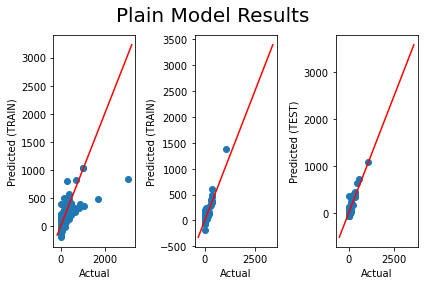

In [ ]:
# scatter plots in the plain model
# specify the dimensions 
fig, axes = plt.subplots(1,3) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("Plain Model Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# this makes the individual subplots
axes[1].scatter(x=y_val, y=val_preds) #first row, first entry (left top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[1].plot(x, x, color='red')


axes[2].scatter(x=y_test, y=test_preds) # first row, second entry (right top)
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[2].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

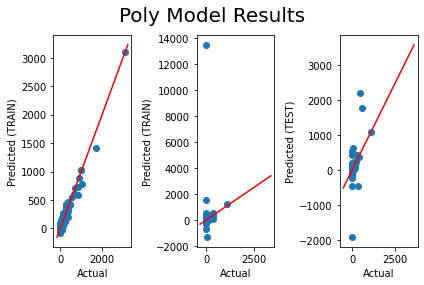

In [ ]:
# scatterplots in the model using the polynomial features
# specify the dimensions 
fig, axes = plt.subplots(1,3) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("Poly Model Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train_poly, y=train_preds_poly) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# this makes the individual subplots
axes[1].scatter(x=y_val_poly, y=val_preds_poly) #first row, first entry (left top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[1].plot(x, x, color='red')


axes[2].scatter(x=y_test_poly, y=test_preds_poly) # first row, second entry (right top)
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[2].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

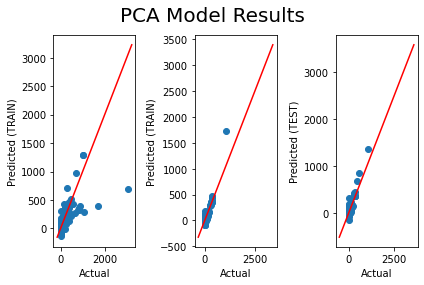

In [ ]:
# scatterplots in the model after PCA
# specify the dimensions 
fig, axes = plt.subplots(1,3) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("PCA Model Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train_pca, y=train_preds_pca) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# this makes the individual subplots
axes[1].scatter(x=y_val_pca, y=val_preds_pca) #first row, first entry (left top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TRAIN)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[1].plot(x, x, color='red')


axes[2].scatter(x=y_test_pca, y=test_preds_pca) # first row, second entry (right top)
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted (TEST)",  fontsize=10)


# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[2].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

## Model3 fit

In [ ]:
# print the orginal sampled data
df.head()

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
412,0,34,1,13.60,24,14.0,0.3,35,0,0.130,...,44,138,602,0.32,46,0.19,0.020,1.6,1.23,37.5
5580,127,6798,28,7.08,0,45.0,2.8,10865,0,0.633,...,27,250,166,0.27,573,0.00,0.114,26.3,1.25,621.3
6289,0,1,1,12.44,45,46.7,1.5,59,0,1.492,...,95,344,485,0.66,17,0.21,0.284,8.4,1.51,15.2
3110,0,0,0,44.60,0,26.5,3.8,45,0,4.468,...,122,160,458,1.05,0,0.01,0.092,0.0,0.07,3.1
2433,0,3,0,22.57,34,25.2,1.9,3,0,3.300,...,139,272,692,1.73,13,0.57,0.117,0.6,0.48,4.1


Now we will remove the records where cholesterol is equal to 0.

In [ ]:
# create a new dataframe tt where the cholesterol values are not equal to 0
tf=df[df['Data.Cholesterol']!=0]
tf # print tf

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
412,0,34,1,13.60,24,14.0,0.3,35,0,0.130,...,44,138,602,0.32,46,0.19,0.020,1.6,1.23,37.5
6289,0,1,1,12.44,45,46.7,1.5,59,0,1.492,...,95,344,485,0.66,17,0.21,0.284,8.4,1.51,15.2
2433,0,3,0,22.57,34,25.2,1.9,3,0,3.300,...,139,272,692,1.73,13,0.57,0.117,0.6,0.48,4.1
4858,1,34,1,32.40,30,29.9,0.8,21,721,3.532,...,105,189,937,1.07,3,0.31,0.224,2.9,1.08,7.7
4958,0,22,0,19.83,1,3.2,0.4,2,0,1.032,...,28,33,296,0.28,28,0.01,0.038,0.1,0.44,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,1,49,1,2.46,49,30.9,0.5,13,2358,3.523,...,111,189,397,0.76,8,0.16,0.137,3.4,0.87,2.0
269,0,0,0,7.40,1,15.7,0.0,0,0,0.700,...,55,86,31,0.60,60,0.20,0.040,5.9,0.59,0.0
2095,10,97,1,4.39,32,47.4,0.9,167,0,2.494,...,95,216,245,2.02,8,0.61,0.240,13.7,0.97,23.0
5055,118,328,1,7.74,36,24.3,0.5,108,0,0.545,...,32,64,345,0.26,47,0.09,0.037,1.8,0.27,16.7


In [ ]:
# to verify that we have none records with 0 cholesterol
tf[tf['Data.Cholesterol']==0]

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K


Hence we have got rid of the records where cholesterol is 0.

### Subsetting

In [ ]:
# Subset
tf=tf.iloc[:,3:] 

Got rid of the categorical columns.

In [ ]:
# subsetting the whole data set for prediction
yt = tf['Data.Cholesterol'] # separate the target variable
print(yt.shape)
Xt = tf.drop(['Data.Cholesterol'], axis=1) # separate the predictor variables
print(Xt.shape)

(4192,)
(4192, 31)


### Partition


In [ ]:
# partitioning the data set
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 14) # partition into 80:20 ratio to train and test for both predictor and target variables
Xt_test, Xt_val, yt_test, yt_val = train_test_split(Xt_test, yt_test, test_size=0.5, random_state=14) # partition the test data set in 50:50 ratio to validation and test data sets
print(Xt_train.shape), print(yt_train.shape)
print(Xt_val.shape), print(yt_val.shape)
print(Xt_test.shape), print(yt_test.shape)

(3353, 31)
(3353,)
(420, 31)
(420,)
(419, 31)
(419,)


(None, None)

In [ ]:
# convert these all to numpy arrays
Xt_train = np.array(Xt_train)
Xt_val = np.array(Xt_val)
Xt_test = np.array(Xt_test)
yt_train = np.array(yt_train)
yt_val = np.array(yt_val)
yt_test = np.array(yt_test)

### Min Max Scaler

We use MinMaxScaler to transform features by scaling each feature to a specific range of [0,1].

In [ ]:
scaler = MinMaxScaler()
# train the transformation
Xt_train = scaler.fit_transform(Xt_train)
# take that coordinate system on Xt_train, and APPLY it to Xt_val
Xt_val = scaler.transform(Xt_val)
# take that coordinate system yon Xt_train, and APPLY it to Xt_test
Xt_test = scaler.transform(Xt_test)

### Fit Linear Regression

We fit a Linear Regression in the new data frame.

In [ ]:
# make a variable to store the general model
LR = LinearRegression()
# fit the model
LR = LR.fit(Xt_train, yt_train) 

In [ ]:
# storing the predictions
t_train_preds = LR.predict(Xt_train) # for the train data set
t_val_preds = LR.predict(Xt_val) # for the validation data set
t_test_preds = LR.predict(Xt_test)  # for the test data set

## Model4 fit

Here we repeat the same steps as that of Model2 but in the new data frame.

In [ ]:
# to check the shape of the data set with no records having cholesterol=0
Xt.shape

(4192, 31)

It has 31 columns

### Polynomial Features

In [ ]:
# polynomial and interaction terms
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2) # squared and raised to second power
Xt = poly.fit_transform(Xt)

# store the numpy array into a pd dataframe
Xt = pd.DataFrame(Xt)
print(Xt.shape)  
Xt.head()

(4192, 528)


,0,1,2,3,4,5,6,7,8,9,...,518,519,520,521,522,523,524,525,526,527
0,1.0,13.60,14.0,0.3,35.0,0.0,0.130,2.04,43.0,0.079,...,0.000400,0.0320,0.02460,0.7500,2.56,1.968,60.00,1.5129,46.125,1406.25
1,1.0,12.44,46.7,1.5,59.0,0.0,1.492,5.93,17.0,0.106,...,0.080656,2.3856,0.42884,4.3168,70.56,12.684,127.68,2.2801,22.952,231.04
2,1.0,22.57,25.2,1.9,3.0,0.0,3.300,12.04,13.0,0.214,...,0.013689,0.0702,0.05616,0.4797,0.36,0.288,2.46,0.2304,1.968,16.81
3,1.0,32.40,29.9,0.8,21.0,721.0,3.532,8.39,0.0,0.132,...,0.050176,0.6496,0.24192,1.7248,8.41,3.132,22.33,1.1664,8.316,59.29
4,1.0,19.83,3.2,0.4,2.0,0.0,1.032,1.87,27.0,0.016,...,0.001444,0.0038,0.01672,0.1824,0.01,0.044,0.48,0.1936,2.112,23.04


We can see that the number of columns increased from 31 to 528.

### Splitting

In [ ]:
# now we can split and then fit the model!
Xt_train_poly, Xt_test_poly, yt_train_poly, yt_test_poly = train_test_split(Xt,
                                                        yt, 
                                                        test_size=0.2, 
                                                        random_state=14) 
Xt_test_poly, Xt_val_poly, yt_test_poly, yt_val_poly = train_test_split(Xt_test_poly, yt_test_poly, test_size=0.5, random_state=14) # partition the test data set in 50:50 ratio to validation and test data sets
print(Xt_train_poly.shape), print(yt_train_poly.shape)
print(Xt_val_poly.shape), print(yt_val_poly.shape)
print(Xt_test_poly.shape), print(yt_test_poly.shape)

(3353, 528)
(3353,)
(420, 528)
(420,)
(419, 528)
(419,)


(None, None)

In [ ]:
# convert these all to numpy arrays
Xt_train_poly = np.array(Xt_train_poly)
Xt_val_poly = np.array(Xt_val_poly)
Xt_test_poly = np.array(Xt_test_poly)
yt_train_poly = np.array(yt_train_poly)
yt_val_poly = np.array(yt_val_poly)
yt_test_poly = np.array(yt_test_poly)

### Min Max scaling

In [ ]:
# scaling the dataset

scaler = MinMaxScaler()
# train the transformation
Xt_train_poly = scaler.fit_transform(Xt_train_poly)
# take that coordinate system on X_train, and APPLY it to X_val
Xt_val_poly = scaler.transform(Xt_val_poly)
# take that coordinate system on X_train, and APPLY it to X_test
Xt_test_poly = scaler.transform(Xt_test_poly)

### Fitting PCA

In [ ]:
pca = PCA(n_components = 0.95) # keeping components that maintain 95% of the variance 
Xt_train_pca = pca.fit_transform(Xt_train_poly)

In [ ]:
# convert the array into data frame
Xt_train_pca = pd.DataFrame(Xt_train_pca)
print(Xt_train_pca.shape)
Xt_train_pca.head()

(3353, 55)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.015761,-0.257229,0.243531,-0.044823,-0.204839,0.088742,-0.411199,-0.072005,0.025920,-0.039841,...,0.024522,0.057821,-0.004406,-0.013827,0.065544,-0.035956,0.013678,-0.017691,-0.014942,0.002119
1,-0.504142,0.413504,0.258922,-0.235289,-0.221108,-0.234840,0.170460,-0.124786,-0.016275,-0.079654,...,-0.018209,-0.012617,-0.013231,0.013605,-0.010599,0.014215,-0.022433,0.054663,-0.001849,-0.033269
2,-0.287127,0.614372,0.161228,-0.182388,-0.201114,-0.182465,0.092106,-0.197674,-0.028426,-0.138436,...,0.036217,0.012109,0.028343,-0.025567,0.005882,-0.029035,-0.039468,0.035309,-0.024560,0.009846
3,0.638800,0.385214,-1.094031,0.168725,0.962268,0.561635,0.591266,0.789485,0.327882,-0.843191,...,-0.026584,-0.021413,-0.081657,-0.006213,-0.002495,-0.119488,-0.018454,0.025560,-0.164993,-0.063713
4,-0.097630,0.667957,0.005165,-0.143546,-0.210215,-0.269842,-0.026685,0.045214,-0.021796,-0.048035,...,0.006413,-0.039092,0.037734,-0.043959,0.058266,-0.030411,-0.010464,0.002413,0.018201,0.030715


We can see that 528 columns reduced to 55 columns maintaining 95% of variance

In [ ]:
# Apply PCA to the validation data set
Xt_val_pca = pca.transform(Xt_val_poly)
Xt_val_pca = pd.DataFrame(Xt_val_pca)
print(Xt_val_pca.shape)
Xt_val_pca.head()

(420, 55)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.395086,-0.190981,0.046054,-0.157838,-0.026419,0.168025,0.103811,-0.008725,-0.040129,-0.017042,...,0.016023,0.032301,0.036485,0.000598,0.038669,-0.002174,0.021337,0.001246,-0.035565,-0.030815
1,-0.375542,-0.292470,0.084340,0.158041,-0.063451,0.041429,-0.036816,0.027909,-0.017940,0.051600,...,0.004699,-0.010069,0.001117,0.008651,-0.013036,0.010108,0.005355,0.002676,-0.011230,0.009755
2,0.056787,0.747695,-0.265950,-0.048959,-0.007683,-0.133681,0.001544,0.140633,-0.079520,-0.032856,...,0.013551,-0.026739,0.021918,-0.014446,-0.016626,-0.010693,-0.005586,-0.006528,0.001898,0.007429
3,0.647410,0.822234,-0.488293,0.039263,0.216567,0.700109,0.422302,-0.915439,-0.077436,0.097864,...,-0.031642,-0.038523,0.018984,-0.021768,-0.001656,0.023886,0.044334,0.007963,0.029249,-0.012726
4,-0.487561,-0.331301,0.078564,-0.128495,-0.021918,0.117407,0.006129,0.079588,-0.080229,0.064721,...,0.006075,0.009269,0.006043,0.015555,0.016652,0.015690,-0.006097,0.004915,-0.006735,-0.002610


In [ ]:
# Apply PCA to the test data set
Xt_test_pca = pca.transform(Xt_test_poly)
# see how we have a consistent number of columns between Xt_test_pca and Xt_train_pca?
Xt_test_pca = pd.DataFrame(Xt_test_pca)
print(Xt_test_pca.shape)
Xt_test_pca.head()

(419, 55)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.521814,-0.291355,-0.039939,-0.208203,0.012970,0.162206,0.263184,0.126821,0.022432,0.024621,...,0.001548,0.018550,-0.001547,-0.036740,-0.014417,0.035525,-0.026438,-0.016641,-0.004988,0.013553
1,-0.299941,-0.171873,0.119573,1.501078,-0.297903,-0.201986,0.272491,-0.062433,0.155645,-0.025086,...,-0.027993,0.057360,0.010904,0.087034,-0.054719,-0.081130,0.031837,0.100460,-0.033782,0.020147
2,0.742131,0.844745,-0.515669,0.027528,0.264651,0.915485,0.556585,-1.202030,-0.092841,0.078751,...,-0.089169,-0.025962,0.056489,-0.044093,-0.014592,0.055391,0.013432,-0.056557,-0.005784,-0.061084
3,-0.013362,0.582069,-0.183372,-0.051115,0.422159,0.039874,0.122997,-0.107460,0.223742,-0.060423,...,0.018425,-0.008571,-0.034133,-0.009009,0.012896,0.015219,0.004301,0.019092,-0.004416,0.008399
4,-0.311478,-0.220113,-0.056656,-0.085860,0.008438,0.097495,-0.078741,0.105739,-0.027605,-0.003196,...,0.006884,0.005743,0.000015,-0.004882,-0.016814,0.012029,-0.002217,0.014777,0.000197,-0.002138


In [ ]:
# the y variables are the same as before
yt_train_pca = yt_train
yt_val_pca = yt_val
yt_test_pca = yt_test

### Implementing Linear Regression in the plain dataset

In [ ]:
# We look at the plain model
clf_plain = LinearRegression()
clf_plain = clf_plain.fit(Xt_train, yt_train)

# store the predictions
t_train_preds = clf_plain.predict(Xt_train) 
t_val_preds = clf_plain.predict(Xt_val) 
t_test_preds = clf_plain.predict(Xt_test) 

In [ ]:
print(clf_plain.score(Xt_train, yt_train)) # R2 on train
print(clf_plain.score(Xt_val, yt_val)) # R2 on val
print(clf_plain.score(Xt_test, yt_test)) # R2 on test

0.756059361585975
0.8712757399464599
0.4902109903984272


We observe that the $R^2$ score of the test set is much low.

### Implementing Linear Regression in the dataset with Polynomial features

In [ ]:
# We look at the poly model
clf_poly = LinearRegression()
clf_poly = clf_poly.fit(Xt_train_poly, yt_train_poly)

# store the predictions
t_train_preds_poly = clf_poly.predict(Xt_train_poly) 
t_val_preds_poly = clf_poly.predict(Xt_val_poly) 
t_test_preds_poly = clf_poly.predict(Xt_test_poly) 

In [ ]:
print(clf_poly.score(Xt_train_poly, yt_train_poly)) # R2 on train
print(clf_poly.score(Xt_val_poly, yt_val_poly)) # R2 on val
print(clf_poly.score(Xt_test_poly, yt_test_poly)) # R2 on test

0.9645171575661575
-0.3683212307620847
-1.2053715720788714


We observe that $R^2$ score is negative in the validation and the test data set which is the result of high bias due to curse of dimensionality.

### Implementing Linear Regression in the dataset with reduced features using PCA

In [ ]:
# We look at the pca model
clf_pca = LinearRegression()
clf_pca = clf_pca.fit(Xt_train_pca, yt_train_pca)

# store the predictions
t_train_preds_pca = clf_pca.predict(Xt_train_pca) 
t_val_preds_pca = clf_pca.predict(Xt_val_pca) 
t_test_preds_pca = clf_pca.predict(Xt_test_pca) 

In [ ]:
print(clf_pca.score(Xt_train_pca, yt_train_pca)) # R2 on train
print(clf_pca.score(Xt_val_pca, yt_val_pca)) # R2 on val
print(clf_pca.score(Xt_test_pca, yt_test_pca)) # R2 on test

0.752694930523273
0.8938807635380448
0.4165658291179649


After applying PCA, $R^2$ is better than the prior but comparatively lower than the other two.

### Error Metrics in plain, poly, pca

In [ ]:
# 2) mae - plain
t_trainMAE = mean_absolute_error(yt_train, t_train_preds)
print("This is trainMAE (plain):", t_trainMAE) # train
t_valMAE = mean_absolute_error(yt_val, t_val_preds)
print("This is valMAE (plain):", t_valMAE) # val
t_testMAE = mean_absolute_error(yt_test, t_test_preds)
print("This is testMAE (plain):", t_testMAE) # test

# 2) mae - poly
t_trainMAE_poly = mean_absolute_error(yt_train_poly, t_train_preds_poly)
print("This is trainMAE (poly):", t_trainMAE_poly) # train
t_valMAE_poly = mean_absolute_error(yt_val_poly, t_val_preds_poly)
print("This is valMAE (poly):", t_valMAE_poly) # val
t_testMAE_poly = mean_absolute_error(yt_test_poly, t_test_preds_poly)
print("This is testMAE (poly):", t_testMAE_poly) # test

# 2) mae - pca
t_trainMAE_pca = mean_absolute_error(yt_train_pca, t_train_preds_pca)
print("This is trainMAE (pca):", t_trainMAE_pca) # train
t_valMAE_pca = mean_absolute_error(yt_val_pca, t_val_preds_pca)
print("This is valMAE (pca):", t_valMAE_pca) # val
t_testMAE_pca = mean_absolute_error(yt_test_pca, t_test_preds_pca)
print("This is testMAE (pca):", t_testMAE_pca) # test

This is trainMAE (plain): 17.091353520436904
This is valMAE (plain): 16.51751689166918
This is testMAE (plain): 22.727746220647255
This is trainMAE (poly): 10.207533059332293
This is valMAE (poly): 22.517721649327157
This is testMAE (poly): 38.86393347785629
This is trainMAE (pca): 16.392674291318315
This is valMAE (pca): 15.917261082692185
This is testMAE (pca): 22.436666798945286


We see that the error is much higher in the Test data set after using Polynomial features, This is due to high Bias.

# Analyze and interpret regression errors (20 points)
Use subheaders to keep your notebook really organized!

**Novice...** (10 pts)
* Make scatterplots (x=actual and y= predicted) and calculate at least three error metrics for each partition (train, val, test). A three-panel scatterplot would be nice here.

**Advanced...** (10 pts, 5 pts each)

These are advanced because you need to join those three metadata columns and your predictions together. This is why the shape of a dataset is so important to keep track of! You may need to go back and store these metadata as another dataframe, and then concatenate the two dataframes (be careful of shuffling rows.) Ask on the discussion board or during office hours if you are stuck.

* Which food categories or items does the model have the most trouble predicting? Does your model tend to overestimate or underestimate?
* Which food categories or item does your model make a negative prediction for? 

* Write a few bullets below each item describing what's going on. Don't just make tables/plots and assume someone will understand - show the value of what you did! 

## Novice
For a regression problem, we look at the R2, MAE and MSE for each partition (train, val, test); then make a scatterplot of actual vs. predicted values.

### R2

In [ ]:

# 1) R2 value 
print("This is train R2:", r2_score(y_train, train_preds)) # train
print("This is validation R2:", r2_score(y_val, val_preds)) # train
print("This is test R2:", r2_score(y_test, test_preds)) # test



This is train R2: 0.6511635228682107
This is validation R2: 0.8270740563190632
This is test R2: 0.8095962305515328


We can see that the $R^2$ is good in the test data set, better than the train data set.

### MAE

In [ ]:
# 2) mae
trainMAE = mean_absolute_error(y_train, train_preds) #calculate the mean absolute error of train data
print("This is trainMAE:", trainMAE) # train
valMAE = mean_absolute_error(y_val, val_preds) #calculate the mean absolute error of validation data
print("This is valMAE:", valMAE) # validation
testMAE = mean_absolute_error(y_test, test_preds) #calculate the mean absolute error of test data
print("This is testMAE:", testMAE) # test



This is trainMAE: 17.016914290127964
This is valMAE: 15.616049978362465
This is testMAE: 16.73586639462975


The error of the validation set is least followed by test and then train data set.

### MSE

In [ ]:
# 3) mse
trainMSE = mean_squared_error(y_train, train_preds) #calculate the mean sqaure error of train data
print("This is trainMSE:", trainMSE)
valMSE = mean_squared_error(y_val, val_preds) #calculate the mean sqaure error of validation data
print("This is valMSE:", valMSE)
testMSE = mean_squared_error(y_test, test_preds) #calculate the mean sqaure error of test data
print("This is testMSE:", testMSE)



This is trainMSE: 2360.128581333005
This is valMSE: 839.5061486908977
This is testMSE: 948.5316393852597


The error of the validation set is least followed by test and then train data set.

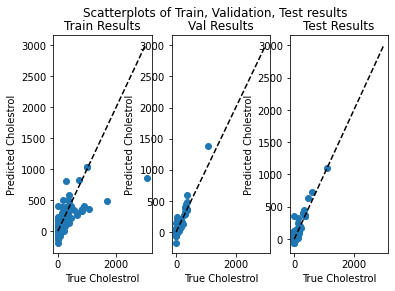

In [ ]:
#Scatterplots of Train, Validation, Test results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Scatterplots of Train, Validation, Test results') #title of the figure
ax1.scatter(x=y_train, y=train_preds) #scatterplot of train results
ax1.plot([0, 3000], [0, 3000], '--k') # 45 degree line
ax1.set_title('Train Results') # sub title
ax2.scatter(x=y_val, y=val_preds) #scatterplot of validation results
ax2.plot([0, 3000], [0, 3000], '--k') # 45 degree line
ax2.set_title('Val Results') # sub title
ax3.scatter(x=y_test, y=test_preds) #scatterplot of test results
ax3.plot([0, 3000], [0, 3000], '--k') # 45 degree line
ax3.set_title('Test Results') # sub title

ax1.set(xlabel='True Cholestrol', ylabel='Predicted Cholestrol') #labeling the sublots
ax2.set(xlabel='True Cholestrol', ylabel='Predicted Cholestrol') #labeling the sublots
ax3.set(xlabel='True Cholestrol', ylabel='Predicted Cholestrol') #labeling the sublots
#fig.tight_layout()
plt.show() # to avoid the single line text

By the scatterplot it is evident that the model performs well in the validation and the test data set.

## Advanced

We are reading the data again in df because now we want to do subsetting of the data frame differently than what we have done earlier.

In [ ]:
# we read the data 
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df.head() # print its head

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


In [ ]:
#Here we randomly sample the data! 
tmp = df.sample(frac = .9, replace = False, random_state = 14)

In [ ]:
#replace the original data frame with the sampled one
df=tmp

In [ ]:
# subsetting the whole data set for prediction
y = df['Data.Cholesterol'] # separate the target variable
print(y.shape)
X = df.drop(['Data.Cholesterol'], axis=1) # separate the predictor variables
print(X.shape)

(6375,)
(6375, 37)


In [ ]:
# partitioning the data set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 14) # partition into 80:20 ratio to train and test for both predictor and target variables
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=14) # partition the test data set in 50:50 ratio to validation and test data sets
print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(5100, 37)
(5100,)
(638, 37)
(638,)
(637, 37)
(637,)


(None, None)

In [ ]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
# Subset to get rid of the categorical variables for modeling
X_train_1=X_train[:,3:] 
X_val_1=X_val[:,3:] 
X_test_1=X_test[:,3:] 

So here is what we did differently from the previous section. Previously we subset the data to numerical columns and then we splitted the data set into train, test and validation. Now we are splitting at first and then we are storing the numberical columns in X_train1, X_val_1, V_test_1, using which we will be doing modeling. The reason for doing this is, we have to concat the exact records with their y variables and the y predictions. if we have done it in the either way it is not possible to match the exact rows with their categorical counterparts as we are doing a shuffling while splitting.

For some reason while scaling, they were converting the arrays into string arrays. So, we don't scale it this time.

In [ ]:
# make a variable to store the general model
LR = LinearRegression()
# fit the model
LR = LR.fit(X_train_1, y_train) 

In [ ]:
# storing the predictions
train_preds = LR.predict(X_train_1) # for the train data set
val_preds = LR.predict(X_val_1) # for the validation data set
test_preds = LR.predict(X_test_1)  # for the test data set

In [ ]:
#check the dimensions
print(train_preds.shape)
print(val_preds.shape)
print(test_preds.shape)

(5100,)
(638,)
(637,)


In [ ]:
#check the dimensions
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(5100, 37)
(638, 37)
(637, 37)


In [ ]:
#check the dimensions
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(5100,)
(638,)
(637,)


We print the shapes of each to see if all the dimensions are matching and yes they are!

In [ ]:
#convert all arrays into data frames as they are easy to work with
X_train=pd.DataFrame(X_train)
X_val=pd.DataFrame(X_val)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_val=pd.DataFrame(y_val)
y_test=pd.DataFrame(y_test)
train_preds=pd.DataFrame(train_preds)
val_preds=pd.DataFrame(val_preds)
test_preds=pd.DataFrame(test_preds)

In [ ]:
#stacking everything together
frames_train = [X_train, y_train, train_preds]
frames_val = [X_val, y_val, val_preds]
frames_test = [X_test, y_test, test_preds]

In [ ]:
# concatenate the meta data
result_train = pd.concat(frames_train, axis=1)
result_val = pd.concat(frames_val, axis=1)
result_test = pd.concat(frames_test, axis=1)

In [ ]:
# the final train set
result_train

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,0,0
0,Beef,"Beef, potatoes, and vegetables including carro...",27311110,444,1047,0,13.46,31.6,1.8,216,...,313,1.16,107,0.3,0.257,9.4,0.76,17.7,16,25.432208
1,Fruit nectar,"Fruit nectar, NFS",64200100,0,402,26,13.12,1.5,0.3,0,...,5,0.02,35,0.0,0.015,15.2,0.21,0.8,0,-3.714758
2,Herring,"Herring, pickled, in cream sauce",26119160,0,5,0,8.59,86.3,0.0,1,...,694,0.49,230,3.42,0.143,0.2,1.43,0.5,23,139.524825
3,Lentils,"Lentils, NFS",41304970,0,5,0,18.71,30.4,7.3,0,...,218,1.18,0,0.0,0.157,1.3,0.86,9.2,0,8.863601
4,Whiting,"Whiting, baked or broiled, no added fat",26157123,0,0,0,0.1,81.9,0.0,0,...,413,1.11,34,2.61,0.177,0.5,0.38,0.1,84,76.633357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,Rice,"Rice, brown, cooked, made with butter",56205014,0,4,0,24.86,9.4,1.6,0,...,212,0.69,16,0.0,0.12,0.0,0.22,0.4,5,2.705427
5096,Squash,"Squash, summer, souffle",75418060,0,66,2,6.8,57.1,0.7,707,...,244,0.6,105,0.25,0.112,6.6,0.46,2.7,92,87.361533
5097,Clam chowder,"Clam chowder, NS as to Manhattan or New Englan...",28350210,0,2,0,7.56,12.5,0.3,1,...,275,0.4,38,4.96,0.082,2.1,0.22,0.5,7,-0.526715
5098,Black beans,"Black beans, NFS",41101990,0,0,0,22.04,30.3,8.1,0,...,217,1.04,0,0.0,0.061,0.0,1.57,10.7,0,3.070790


In [ ]:
# the final val set
result_val

In [ ]:
# the final test set
result_test

In [ ]:
#print the shapes to check consistency
print(result_train.shape)
print(result_val.shape)
print(result_test.shape)

In [ ]:
#concatenation
frames_result = [result_train, result_val, result_test]
frames_result = pd.concat(frames_result, axis=0)

In [ ]:
#print the shape to check consistency
print(frames_result.shape)

In [ ]:
#to see what we have created
frames_result.head()

In [ ]:
#y-y_pred
mm=frames_result.iloc[:,-2]-frames_result.iloc[:,-1]
mm

In [ ]:
#store it in the data frame with the name err
frames_result['err']=mm

In [ ]:
#look at our data frame
frames_result.head()

In [ ]:
# Sort the data frame by err column 
frames_result.sort_values(by=['err'], ascending=False)

The model had the most difficulty in predicting the cholesterol of the Brains, followed by Breaded brains and Goat head. They have predicted them less by 2225.6 units, 1202.38 units and 706.18 units respectively.

In [ ]:
# Sort the data frame by err column 
frames_result.sort_values(by=['err'], ascending=True)

The model had the most difficulty in predicting the cholesterol of the Chitterlings also. They have predicted them more by 537.79 units.

In [ ]:
plt.scatter(frames_result.iloc[:,-3], frames_result.iloc[:,-2],color='blue') #Scatter plot is built between cholesterol and Netcarbs
plt.plot([0, 3000], [0, 3000], '--k') # 45 degree line
plt.xlim(0,3000)  
plt.xlabel('Cholesterol Original') # labelled x axis. 
plt.ylabel('Cholesterol Predicted') # labelled Y axis.
plt.title('Scatterplot between Cholesterol Original and Predicted') # Title was given
plt.show() # To display the plot. 

The model is a good fit. It does not overestimate or underestimate.

In [ ]:
# storing the negative predictions
m1=frames_result[frames_result.iloc[:,-2]<0]

In [ ]:
# view it
m1.head()

m1 is the data set with all negative predictions of cholesterol.

In [ ]:
# to see number of records for each food item which are negatively predicted 
m2=m1.iloc[:,0].value_counts()

In [ ]:
print(m2)

The model makes most negative predictions for Rice, Cookie, Tea, Potato, Coffee.

In [ ]:
# Barplot to see the first few records
plt.bar(m2[0:10].index, m2[0:10])
# Add title
plt.title('Barplot of food itms with most negative prediction');

This bar plot helps us to view which food item is having the greatest negative prediction.

So here we observed that 


*   Our model is fitting the data set well. It is evident through the scatterplot we created. 
*   The model had the most difficulty in predicting the cholesterol of the Brains, followed by Breaded brains and Goat head. They have predicted them less by 2225.6 units, 1202.38 units and 706.18 units respectively.
*   The model makes most negative predictions for Rice, Cookie, Tea, Potato, Coffee. That means it is not performing well for these food items as food cannot have negative cholesterol. Rice, Cookie, Tea, Potato, Coffee etc. can have 0 cholesterol but they can never have it in negative.


















# Modeling (Classification) (10 pts)
Use subheaders to keep your notebook really organized! 

I'd like you to also practice your classification modeling skills. Any regression problem can turn into a classification problem if you recode the target variable. 

Calculate the median cholesterol and build classification models to predict below or equal to (y=0) or greater than (y=1) the median cholesterol value from the other nutrition variables? Use the entire dataset (don't drop any rows where cholesterol == 0, these will be helpful!)

* Model4: Fit a very basic logistic regression model (vanilla)
* Model5: Show off! Use all of your pre-processing and advanced modeling techniques to build an amazing model. You can use the same features from Model 2 if you want to.

In [ ]:
# we read the data again, as we want to do the modeling on the original data set
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')
df.head() # print its head

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


In [ ]:
# Here we randomly sample the data! 
tmp = df.sample(frac = .9, replace = False, random_state = 14)

In [ ]:
# Replacing the original DataFrame with the sampled one
df=tmp

In [ ]:
np.median(df['Data.Cholesterol']) # We are finding the median of the cholestrol column.

8.0

In [ ]:
df['Data.Cholesterol'] = np.where(df['Data.Cholesterol'] > np.median(df['Data.Cholesterol']), 1, 0) # We are recoding the Data.Cholestrol based on the median values.

In [ ]:
df # Calling the dataframe to check if the Data.Cholestrol column is recoded into 1's & 0's accordingly.

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
412,Vegetable dip,"Vegetable dip, light",12350255,0,34,1,13.60,1,14.0,0.3,...,44,138,602,0.32,46,0.19,0.020,1.6,1.23,37.5
5580,Collards,"Collards, frozen, cooked, no added fat",72107212,127,6798,28,7.08,0,45.0,2.8,...,27,250,166,0.27,573,0.00,0.114,26.3,1.25,621.3
6289,Potato and ham fritters,"Potato and ham fritters, Puerto Rican style",77121110,0,1,1,12.44,1,46.7,1.5,...,95,344,485,0.66,17,0.21,0.284,8.4,1.51,15.2
3110,Roll,"Roll, bran, NS as to type of bran",51000400,0,0,0,44.60,0,26.5,3.8,...,122,160,458,1.05,0,0.01,0.092,0.0,0.07,3.1
2433,Frankfurter or hot dog sandwich,"Frankfurter or hot dog sandwich, beef, plain, ...",27564061,0,3,0,22.57,1,25.2,1.9,...,139,272,692,1.73,13,0.57,0.117,0.6,0.48,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,Beef and vegetables excluding carrots,"Beef and vegetables excluding carrots, broccol...",27415200,10,97,1,4.39,1,47.4,0.9,...,95,216,245,2.02,8,0.61,0.240,13.7,0.97,23.0
6117,Vegetable mixture,"Vegetable mixture, dried",75365000,3477,9994,235,47.79,0,87.1,18.7,...,399,1607,360,3.27,988,0.00,0.920,177.8,5.95,222.7
5055,Matzo ball soup,Matzo ball soup,58404500,118,328,1,7.74,1,24.3,0.5,...,32,64,345,0.26,47,0.09,0.037,1.8,0.27,16.7
3257,Bagel,"Bagel, wheat, with raisins",51301800,0,2,0,51.93,0,9.9,4.1,...,138,215,398,1.03,0,0.00,0.149,0.2,0.30,1.7


In [ ]:
# Subsetting and removing the two categorical columns  in the dataset
df = df.drop(['Category','Description'], axis = 1) 
df

,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
412,12350255,0,34,1,13.60,1,14.0,0.3,35,0,...,44,138,602,0.32,46,0.19,0.020,1.6,1.23,37.5
5580,72107212,127,6798,28,7.08,0,45.0,2.8,10865,0,...,27,250,166,0.27,573,0.00,0.114,26.3,1.25,621.3
6289,77121110,0,1,1,12.44,1,46.7,1.5,59,0,...,95,344,485,0.66,17,0.21,0.284,8.4,1.51,15.2
3110,51000400,0,0,0,44.60,0,26.5,3.8,45,0,...,122,160,458,1.05,0,0.01,0.092,0.0,0.07,3.1
2433,27564061,0,3,0,22.57,1,25.2,1.9,3,0,...,139,272,692,1.73,13,0.57,0.117,0.6,0.48,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,27415200,10,97,1,4.39,1,47.4,0.9,167,0,...,95,216,245,2.02,8,0.61,0.240,13.7,0.97,23.0
6117,75365000,3477,9994,235,47.79,0,87.1,18.7,3708,2426,...,399,1607,360,3.27,988,0.00,0.920,177.8,5.95,222.7
5055,58404500,118,328,1,7.74,1,24.3,0.5,108,0,...,32,64,345,0.26,47,0.09,0.037,1.8,0.27,16.7
3257,51301800,0,2,0,51.93,0,9.9,4.1,79,0,...,138,215,398,1.03,0,0.00,0.149,0.2,0.30,1.7


## Subsetting 

In [ ]:
# Subsetting the dataset for Prediction.
y = df['Data.Cholesterol'] # Seperating the Data.Cholestrol column seperately because it is the targer variable,
print(y.shape)
X = df.drop(['Data.Cholesterol'], axis=1) 
print(X.shape)

(6375,)
(6375, 35)


## Partitioning the Dataset

In [ ]:
# Partitioning the Dataset Accordingly.
# Initially, We Partition the dataset into 80:20 ratio to train and test for both Predictor and Target Variable.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 14) 

# We partition the test dataset accordingly into 50:5o ratio and assigning them to val each part as Validation an dataset accordingly.
# As we want both the validation and Test set to be equal. We give the size as 0.5 and again do thr partition.
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=14)
print(X_train.shape), print(y_train.shape) # Checking the shape of the Trained partition. 
print(X_val.shape), print(y_val.shape) # Checking the shape of the Validation partition. 
print(X_test.shape), print(y_test.shape)  # Checking the shape of the Test partition. 

(5100, 35)
(5100,)
(638, 35)
(638,)
(637, 35)
(637,)


(None, None)

In [ ]:
# Convert all the sets into Numpy arrays.
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
X_test # Just checking one of the value to find out, if it is converted into Numpy arrays

array([[5.320401e+07, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.500000e-01, 6.500000e+00],
       [5.440807e+07, 0.000000e+00, 0.000000e+00, ..., 2.100000e+00,
        4.900000e-01, 2.800000e+00],
       [5.530002e+07, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        2.800000e-01, 2.000000e-01],
       ...,
       [5.712410e+07, 2.700000e+01, 4.100000e+01, ..., 5.560000e+01,
        5.900000e-01, 1.800000e+00],
       [9.162100e+07, 0.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.221035e+07, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        2.800000e-01, 0.000000e+00]])

## Scaling 

In [ ]:
# Using the MinMax Scaler because it shrinks the data accordingly and puts them all in the range of 0 anf 1.
scaler = MinMaxScaler()
# Train the transformation of X_train using fit_transform.
X_train = scaler.fit_transform(X_train)
# Taking that coordinate system that you just learned on X_train, and applying the coordinate system to  X_val.
X_val = scaler.transform(X_val)
# Taking that coordinate system that you just learned on X_train, and applying the coordinate system to X_test
X_test = scaler.transform(X_test)

In [ ]:
tmp = pd.DataFrame(X_train) # Converting the train dataset to the data frame to see it's Statistic
tmp.describe() #We check the summer statistic, We have found that all the values are between 1 & 0.

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,...,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000
mean,0.424627,0.009003,0.018108,0.002605,0.205460,0.056677,0.037061,0.013787,0.005883,0.047736,...,0.095016,0.062149,0.048517,0.012896,0.007760,0.009748,0.016453,0.021123,0.007300,0.008564
std,0.272609,0.054451,0.071679,0.021972,0.216941,0.069606,0.057009,0.065291,0.026356,0.066374,...,0.091361,0.053715,0.050374,0.029272,0.024653,0.032885,0.031706,0.052531,0.022420,0.033816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181466,0.000000,0.000000,0.000000,0.054200,0.016340,0.002165,0.000000,0.000000,0.009882,...,0.034290,0.032205,0.017931,0.003642,0.000214,0.000000,0.004417,0.000000,0.001539,0.000488
50%,0.474633,0.000000,0.000495,0.000000,0.131950,0.032353,0.021645,0.001185,0.000000,0.027303,...,0.072078,0.052556,0.044542,0.006980,0.002136,0.002499,0.009250,0.002684,0.003614,0.002256
75%,0.630496,0.000215,0.005165,0.000520,0.254525,0.074183,0.045996,0.005333,0.000000,0.062227,...,0.133660,0.077978,0.064323,0.013883,0.006515,0.007775,0.016833,0.019939,0.007430,0.005671
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
tmp = pd.DataFrame(X_val) # Converting the validation part into a data frame.  
tmp.describe() # Checking the summary statistic for X_val

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,...,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,0.420851,0.009367,0.019259,0.002500,0.207490,0.058103,0.034893,0.018763,0.005193,0.053713,...,0.088529,0.063072,0.045787,0.013858,0.008942,0.010378,0.016862,0.025593,0.006190,0.009857
std,0.274824,0.051163,0.067779,0.014700,0.222312,0.086621,0.047304,0.087374,0.022588,0.114186,...,0.086325,0.088658,0.042797,0.033642,0.037688,0.049719,0.028562,0.099590,0.010644,0.035203
min,0.001247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181468,0.000000,0.000000,0.000000,0.051775,0.016176,0.002165,0.000000,0.000000,0.008574,...,0.031666,0.031134,0.012381,0.003262,0.000107,0.000000,0.004188,0.000000,0.001406,0.000366
50%,0.473229,0.000000,0.000495,0.000000,0.130250,0.032516,0.023810,0.001119,0.000000,0.025944,...,0.067530,0.052271,0.043048,0.006777,0.001709,0.002360,0.009167,0.002684,0.003481,0.002165
75%,0.633502,0.000215,0.005147,0.000520,0.270825,0.069690,0.045455,0.004460,0.000000,0.062910,...,0.129461,0.076121,0.062011,0.013327,0.006595,0.007219,0.017646,0.022143,0.007145,0.005366
max,0.999995,0.700537,0.772605,0.254943,0.996000,1.340196,0.487013,1.029890,0.273714,2.324606,...,0.924423,1.725221,0.481002,0.674691,0.820143,1.144523,0.312500,2.147239,0.141365,0.345488


## Regression

In [ ]:
# Importing all the regression functions that I would require to use it for my logisitic regression.
from sklearn.linear_model import LogisticRegression

# LASSO Regression Functions
from sklearn.linear_model import Lasso, LassoCV # We can do both Lasso Classification & Ridge Classification

# RIDGE Regression Functions
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV

# Random Forest Classifier Functions
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [ ]:
LR = LogisticRegression() # use logistic for a classification problem
LR = LR.fit(X_train, y_train) # fitting the model
print(LR.score(X_train,y_train)) # Return the score (for Logistic regression, it is the mean accuracy)
print(LR.score(X_test,y_test)) # Return the score (for Logistic regression, it is the mean accuracy)

0.8745098039215686
0.858712715855573


### Lasso Regressions

In [ ]:
# Doing the Lasso Regression.
lassolr = LogisticRegression(penalty='l1', solver='liblinear') 
lassolr.fit(X_train,y_train)  # fitting the Lasso model
print(lassolr.score(X_train,y_train)) # Return the training model score for the Lasso regression 
print(lassolr.score(X_test,y_test)) # Return the testing modelk score for the Lasso regression 

0.9117647058823529
0.9042386185243328


### Ridge Regressions

In [ ]:
# Using cross-validation for finding the best Alpha.
ridgeclasscv = RidgeClassifierCV(alphas=[0.0001,0.01, 0.1, 0.5, 1, 5, 7, 10, 100, 200]) # Using different alpha values and crossfitting the model.
ridgeclasscv.fit(X_train, y_train) # Fitting the Ridge Model
optimal = ridgeclasscv.alpha_ # Finding the optimal alpha value
print("In the above alpha values," ,optimal, "is the optimal") 
# we can conclude that in those 10 alpha values, 0.01 is the optimal value
clf = RidgeClassifier(alpha=1).fit(X_train, y_train) # Return the training model score for the Lasso regression 
print(clf.score(X_train,y_train)) # Return the training model score for the Lasso regression 
print(clf.score(X_test,y_test)) # Return the testing modelk score for the Lasso regression 

In the above alpha values, 1.0 is the optimal
0.8480392156862745
0.8226059654631083


### Random Forest Classifier

In [ ]:
RandomForest = RandomForestClassifier() # Calling the random forest classifier.
RandomForest = RandomForest.fit(X_train, y_train) # Fitting the random forest model.
print(RandomForest.score(X_train, y_train)) # Return the training model score for the Raandom Forest
print(RandomForest.score(X_test, y_test)) # Return the test model score for the Raandom Forest

1.0
0.9858712715855573


In [ ]:
# Storing the Prediction Value for all the data Partitions.
train_preds = LR.predict(X_train) # for the train data set
val_preds = LR.predict(X_val) # for the validation data set
test_preds = LR.predict(X_test)  # for the test data set

We have done four different Modeling Techniques which include:

1) Logistic Regression

2) Lasso Regression

3) Ridge Regression

4) Random Forest Classifier

Among the different modelling techniques that I have considered, Random Forest Classifier had the best accuracy among the other models. It can also be seen the accuracy for the test partition for the Random Classifier is the best.Random forest usually give t=one of the target variable is binary in nature. Hence, Random Forest gives the best accuracy.

Lasso is the second best when compared with the other regression models followed by Ridge and normal Logistic regression. Lasso and Ridge have better scores than the normal logistic regression. This is because they use penalty terms and provide by shrinking  regression coefficients. 


# Analyze and interpret classification errors (10 pts)
Use subheaders to keep your notebook really organized!

We will just do a basic analysis on the classification models.

For each model...
* Create a confusion matrix for the train, val and test partitions
* Create a classification report for the train, val and test partitions

Discuss the concepts of TP, TN, FP, FN and precision, recall and F-1 score. How does your model do? You should have at least 5 detailed bullet points here. Is your model better at predicting 0s or 1s? How does this affect how your model might be used by a nutritionist?

**Optional:** Though not required, you are welcome to dig deeper into which records were misclassified and what they have in common. You may get bonus points if you do something awesome here.

In [ ]:
# Storing the general model of Logistic Regression.
LR = LogisticRegression() # use logistic for a classification problem
LR = LR.fit(X_train, y_train) # always going to be (X_train, y_train)

In [ ]:
# Importing the modules that are making for Classification Report and Confusion Matrix.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Classification Report & Confusion Matrix for Training Partition 

In [ ]:
# Creating classification reports for training set.
# Train results
trainResults = classification_report(y_train, train_preds)  
print(trainResults)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2559
           1       0.90      0.84      0.87      2541

    accuracy                           0.87      5100
   macro avg       0.88      0.87      0.87      5100
weighted avg       0.88      0.87      0.87      5100



In [ ]:
# Making a Confusion Matrix
confusion_matrix(y_train, train_preds)

# Top left is TN
# Bottom left is FN
# Top right is FP
# Bottom right is TP

array([[2334,  225],
       [ 415, 2126]])

In [ ]:
# Here are the TP, TN, FN and FP values individually.
tn, fp, fn, tp = confusion_matrix(y_train, train_preds).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 2126
TN: 2334
FP: 225
FN: 415


 # Classification Report & Confusion Matrix for the Validation Partition 

In [ ]:
# Creating classification reports for the validation set.
# Validation results
trainResults = classification_report(y_val, val_preds)
print(trainResults)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       325
           1       0.92      0.83      0.87       313

    accuracy                           0.88       638
   macro avg       0.88      0.88      0.88       638
weighted avg       0.88      0.88      0.88       638



In [ ]:
# Confusion Matrix for the Validation set
confusion_matrix(y_val, val_preds)

# Top left is TN
# Bottom left is FN
# Top right is FP
# Bottom right is TP

array([[301,  24],
       [ 52, 261]])

In [ ]:
# Here are the TP, TN, FN and FP values for the validations set.
tn, fp, fn, tp = confusion_matrix(y_train, train_preds).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 2126
TN: 2334
FP: 225
FN: 415


 # Classification Report & Confusion Matrix for the Test Partition 

In [ ]:
# Creating classification reports for Test set.
# Test results 
testResults = classification_report(y_test, test_preds) # Finding the classification reports for the test partition.
print(testResults)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       310
           1       0.90      0.82      0.86       327

    accuracy                           0.86       637
   macro avg       0.86      0.86      0.86       637
weighted avg       0.86      0.86      0.86       637



In [ ]:
# Confusion Matrix for the Test set.
confusion_matrix(y_test, test_preds)

# Top left is TN
# Bottom left is FN
# Top right is FP
# Bottom right is TP

array([[280,  30],
       [ 60, 267]])

In [ ]:
# Here are the values of TP, TN, FP & FN for the test set.
tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 267
TN: 280
FP: 30
FN: 60


**ANALYSIS OF CLASSIFICATION ERRORS**

**PRECISION**

Precision is the ability of a classifier to not label an instance positive that is actually negative.

*`Precision = TP/(TP + FP)`*


* From the Precision column of the classification report of the training data,
our model predicts the 1's with higher accuracy than 0's.
* From the Precision column of the classification report of the validation data,our model predicts the 1's with higher accuracy than 0's.
* From the Precision column of the classification report of the test data, our model predicts the 1's with higher accuracy than 0's.

We can find out that our model predicts 1's higher than 0's in all of the data partitions.

**Recall**

From the Recall column, We can find out that if the instance is correctly identified of either 0 or 1.

*`Recall = TP/(TP+FN)`*


* From the recall column of the classification report of the training data, 0 has higher recall than 1.
* From the recall column of the classification report of the validation data, both 0 has a higher recall than 1
* From the recall column of the classification report of the test data, 0 higher than recall than 1.

We can find out that our model predicts 0's having a higher recall than 1's in all of the data partitions.

**F1 Score**
Recall is the harmonic mean of precision and recall. The F1 score lies between 0 and 1. The more the F1 score, the better the model is.

*`F1 Score = 2x(Precision x Recall) / (Recall + Precision`*


* From the F1 score column of the classification report of the training data, 0 has a higher F1 score than 1. 
* From the recall column of the classification report of the validation data, 0 has a higher F1 Score than 1. 
* From the recall column of the classification report of the test data, both 1 and 0 have the same F1 score.

The model has good F1 scores for both 0's and 1's. But comparitively, 0's F1 scores are higher than that of 1's. As we can see predicting accuracy for 1 is high and recall is also high. The nutritionists prediction won't have major misclassifications. She wouldn't need to worry about her predictions. She can add more data to increase the prediction accuracy.  

# Conclusion (2.5 pts)
What did you find at the end of all of your analysis and modeling? Summarize your efforts and major findings. Suggest how you might be able to expand on this research in future projects. 



In our initial analysis, we discovered that cholesterol and choline content have a substantial favorable relationship in our research.
The highest cholestrol level is seen in dry, unconstituted whole milk, which can be classified as a very dangerous type of milk.
The foods with the highest net carbohydrates are sugar substitutes and sugar blends.
The lowest net carbohydrates are found in the almond oil food category.
Cholesterol is low, which is excellent, due to the high mineral content.
We may deduce from the scatterplots that foods with high mineral and vitamin content have low Netcarbs.
Milk, nutritional powder, and buns, for example, are all nutritious foods.
Milk Chocolate Candies, Milk Cereal Bars, Milk Chocolate Candy, Milk Dessert or Milk Candy, and Nutrition Bars all have a high Crabohydrate concentration, according to our analysis.

Following this analysis we ran a Linear regression model in the sampled data set and it performed well in predicting the Cholesterol content in the food.  We used some advanced modeling techniques such as expanding the data set by adding polynomial features for better fit before doing Linear Regression, but that resulted in high bias. We finally did PCA to do dimension reduction and then the Linear regression gave almost similar results to what it is giving for the original data set, without using these techniques. So, unfortunately using advanced modeling techniques did not give better results.
We concatenated all the metadata together to find how accurate our prediction was.
The model had the most difficulty in predicting the cholesterol of the Brains, followed by Breaded brains and Goat head. Also, the model made negative predictions for Rice, Cookie, Tea, Potato, Coffee. That means it is not performing well for these food items as food cannot have negative cholesterol. Rice, Cookie, Tea, Potato, Coffee etc. can have 0 cholesterol but they can never have it in the negative.

We then performed four different Classification Modeling Techniques. Among the different modelling techniques that I have considered, Random Forest Classifier had the best accuracy among the other models. It can also be seen the accuracy for the test partition for the Random Classifier is the best. Random forest is the best here because our target variable is binary in nature and also splits accordingly.

From the classification report, We can find out that our model predicts 1's higher than 0's in all of the data partitions. We can find out that our model predicts 0's having a higher recall than 1's in all of the data partitions. The model has good F1 scores for both 0's and 1's. But comparitively, 0's F1 scores are higher than that of 1's.

Going forward, we believe this information can be further expanded upon with data related to human or animal consumption of foods, and the direct impact those foods have on their body's operations. For instance, the correlations and models established in this project can be utilized as a baseline upon which to make estimations and inferences about impacts of certain nutrients, based on relationships we have established in this project. To that end, this information could serve a purpose in being explored further in the fields of nutrition and general health.

# Group Member Efforts - important!
Please list group members, what they did, and the percentage that each team member contributed (should sum to 100% across all group members). 

For example, if a team mate did not participate, list their name and give them a 0%. This person will get a 0 for the project grade. Don't be that person!

John Fowler - 25% - Opening and closing segments, initial data exploration, literary review.

Konda Akash Deep - 25% - EDA

Madhusree Chowdhury - 25% - Linear Regression

Shylesh Pala - 25% - Logistic Regression